### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [852]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd
import numpy as np
import plotly as px
pd.set_option('display.max_columns', None)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [853]:
data = pd.read_csv('data/coupons.csv')

In [854]:
data.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [855]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [856]:
# Getting the value counts for each column.

for c in data.columns:
    print('****************************************')
    print(f'Value Counts for {c.capitalize()}')
    print('****************************************')
    print(data[c].value_counts().sort_values())
    print('\n')
    

****************************************
Value Counts for Destination
****************************************
Work               3164
Home               3237
No Urgent Place    6283
Name: destination, dtype: int64


****************************************
Value Counts for Passanger
****************************************
Kid(s)       1006
Partner      1075
Friend(s)    3298
Alone        7305
Name: passanger, dtype: int64


****************************************
Value Counts for Weather
****************************************
Rainy     1210
Snowy     1405
Sunny    10069
Name: weather, dtype: int64


****************************************
Value Counts for Temperature
****************************************
30    2316
55    3840
80    6528
Name: temperature, dtype: int64


****************************************
Value Counts for Time
****************************************
10PM    2006
2PM     2009
10AM    2275
7AM     3164
6PM     3230
Name: time, dtype: int64


**************

3. Decide what to do about your missing data -- drop, replace, other...

### Cleaning Data

* Dropped car column as there were only 108 non-null values.
* Renamed field names for better clarity.
* Replaced age non-numeric data with values and converted to integer.
* For remaining columns, filled missing values with N/A.
* Created some columns for grouping later.

In [857]:
# Dropping car column as there are only 108 non-null values.
cleaned_data = data.drop('car', axis=1)

In [858]:
# Renaming some fields for better understanding.

cleaned_data = cleaned_data.rename(columns = {'passanger':'passenger',
                                              'RestaurantLessThan20':'Restaurant_<20_Frequency',
                                              'Restaurant20To50':'Restaurant_20to50_Frequency',
                                              'toCoupon_GEQ5min':'Coupon_Distance_>=5Min',
                                              'toCoupon_GEQ15min':'Coupon_Distance_>=15Min',
                                              'toCoupon_GEQ25min':'Coupon_Distance_>=25Min',
                                              'Y':'accepted_coupon',
                                              'Bar':'Bar_Frequency',
                                              'CoffeHouse':'Coffee_House_Frequency',
                                              'CarryAway':'Carry_Away_Frequency'
                                             })

In [859]:
#Replacing non-numeric with value and converting ages to numeric from string.

age_replacements = {'below21':'20', '50plus':'50'}
cleaned_data['age'] = cleaned_data['age'].replace(age_replacements).astype(int)
cleaned_data['age'].unique()

array([21, 46, 26, 31, 41, 50, 36, 20])

In [860]:
#Replacing null values with 'N/A' for remaining columns.

cleaned_data = cleaned_data.fillna('N/A')

In [861]:
# Created columns for grouping and charting to answer questions.

cleaned_data['direction_traveling'] = cleaned_data['direction_same'].apply(lambda x: 'Same' if x == 1 else 'Opposite')
cleaned_data['Age_Over_25'] = cleaned_data['age'].apply(lambda x: 'Yes' if x > 25 else 'No' )

peak_time = ['2PM','6PM']
cleaned_data['2PM_or_6PM'] = cleaned_data['time'].apply(lambda x: 'Yes' if x in peak_time else 'No' )

bar1 = ['1~3','gt8','4~8']
cleaned_data['Bar_Frequency_Greater_1'] = cleaned_data['Bar_Frequency'].apply(lambda x: 'Yes' if x in bar1 else 'No' )

bar3 = ['gt8','4~8']
cleaned_data['Bar_Frequency_Greater_3'] = cleaned_data['Bar_Frequency'].apply(lambda x: 'Yes' if x in bar3 else 'No' )

cleaned_data['bar1_age_25'] = cleaned_data.apply(lambda x: 'Yes' if x['Bar_Frequency_Greater_1'] == 'Yes' and x['Age_Over_25'] == 'Yes' else 'No', axis=1 )



In [862]:
# cleaned data has no null values.

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   destination                  12684 non-null  object
 1   passenger                    12684 non-null  object
 2   weather                      12684 non-null  object
 3   temperature                  12684 non-null  int64 
 4   time                         12684 non-null  object
 5   coupon                       12684 non-null  object
 6   expiration                   12684 non-null  object
 7   gender                       12684 non-null  object
 8   age                          12684 non-null  int32 
 9   maritalStatus                12684 non-null  object
 10  has_children                 12684 non-null  int64 
 11  education                    12684 non-null  object
 12  occupation                   12684 non-null  object
 13  income                       12

In [863]:
cleaned_data.head(3)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar_Frequency,CoffeeHouse,Carry_Away_Frequency,Restaurant_<20_Frequency,Restaurant_20to50_Frequency,Coupon_Distance_>=5Min,Coupon_Distance_>=15Min,Coupon_Distance_>=25Min,direction_same,direction_opp,accepted_coupon,direction_traveling,Age_Over_25,2PM_or_6PM,Bar_Frequency_Greater_1,Bar_Frequency_Greater_3,bar1_age_25
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,N/A,4~8,1~3,1,0,0,0,1,1,Opposite,No,Yes,No,No,No
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,N/A,4~8,1~3,1,0,0,0,1,0,Opposite,No,No,No,No,No
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,N/A,4~8,1~3,1,1,0,0,1,1,Opposite,No,No,No,No,No


### Created Two Functions for Bar Chart and Grouping a Dataframe:

* "bar_chart" is for a bar chart to present grouped data.
* "group_percentages" accepts a dataframe, and dataframe list of columns, groups the data by columns to get acceptance rate and chart the data.

In [864]:
# Create a function to return a bar chart.

def bar_chart(df, x_col):
    sns.barplot(data=df, x=x_col, y='percent_accepted')
    tick_formatter = mtick.FuncFormatter(lambda x, _: f'{x * 100:.0f}%')
    plt.gca().yaxis.set_major_formatter(tick_formatter)
    plt.xticks(rotation=45, fontsize=8)
    plt.title(f'Coupon Offer Acceptance Rate by {x_col.capitalize()}')
    plt.show()

In [865]:
# Create a function to group a dataframe based on columns list and get the percent that accepted a coupon.

def group_percentages(df, cols):
    '''df=dataframe, cols=list of columns'''
    x = df.groupby(cols)['accepted_coupon'].agg(['mean','sum', 'count']).reset_index()
    x = x.rename(columns={'mean':'percent_accepted', 'sum':'num_accepted'})
    
    c = bar_chart(x, x[cols].name)
    
    print ('\n**********************************************************************************\n')
    print (x,c)
    print ('\n**********************************************************************************\n')

4. What proportion of the total observations chose to accept the coupon? 



In [866]:
# Answer to number 4.  Acceptance rates overall.

percent_accepted = cleaned_data['accepted_coupon'].value_counts(normalize=True)
percent_accepted = percent_accepted.reset_index()
percent_accepted.columns=['accepted_coupon','percent']
percent_accepted

,accepted_coupon,percent
0,1,0.568433
1,0,0.431567


5. Use a bar plot to visualize the `coupon` column.

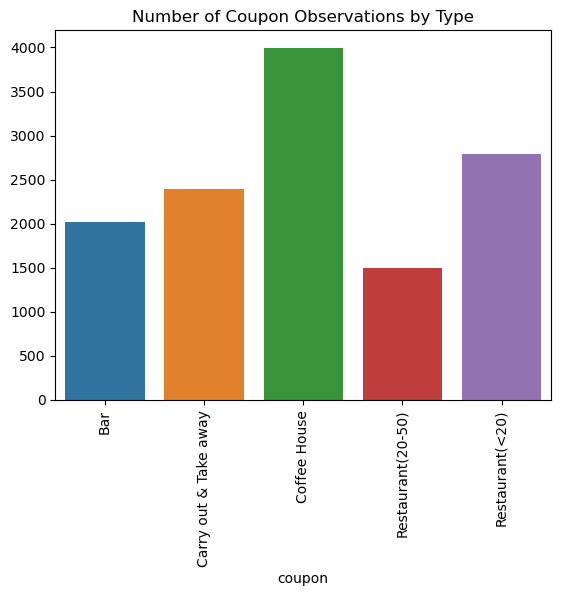

In [867]:
clean_grouped = cleaned_data.groupby('coupon')['coupon'].count()

sns.barplot(x=clean_grouped.index, y=clean_grouped.values)
# tick_formatter = mtick.FuncFormatter(lambda x, _: f'{x * 100:.0f}%')
# plt.gca().yaxis.set_major_formatter(tick_formatter)
plt.xticks(rotation=90)
plt.title('Number of Coupon Observations by Type')
plt.show()


In [868]:
cleaned_data['coupon'].count()

12684

6. Use a histogram to visualize the temperature column.

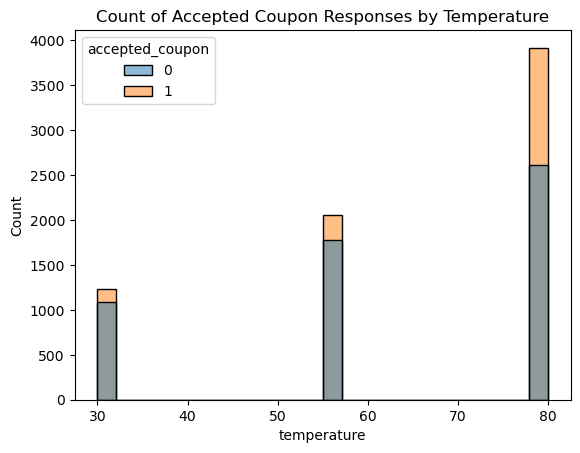

In [869]:
sns.histplot(cleaned_data, x='temperature', hue='accepted_coupon')
plt.title('Count of Accepted Coupon Responses by Temperature')
plt.show()

### Acceptance Rates by Column for Entire Dataset

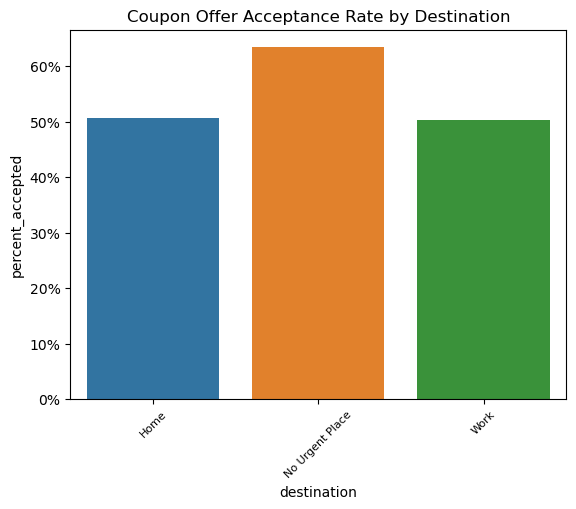


**********************************************************************************

       destination  percent_accepted  num_accepted  count
0             Home          0.506333          1639   3237
1  No Urgent Place          0.633774          3982   6283
2             Work          0.502212          1589   3164 None

**********************************************************************************



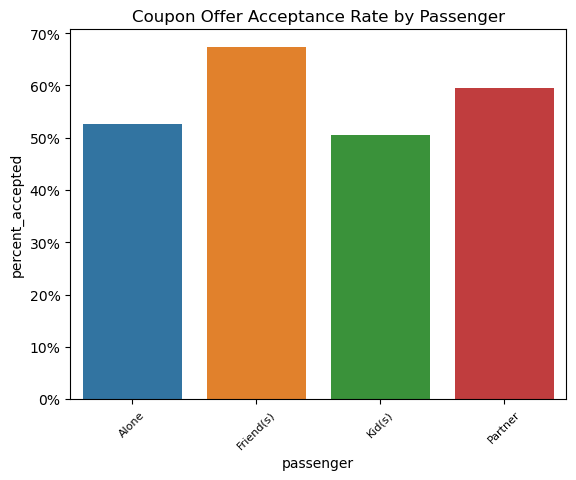


**********************************************************************************

   passenger  percent_accepted  num_accepted  count
0      Alone          0.525804          3841   7305
1  Friend(s)          0.673438          2221   3298
2     Kid(s)          0.504970           508   1006
3    Partner          0.595349           640   1075 None

**********************************************************************************



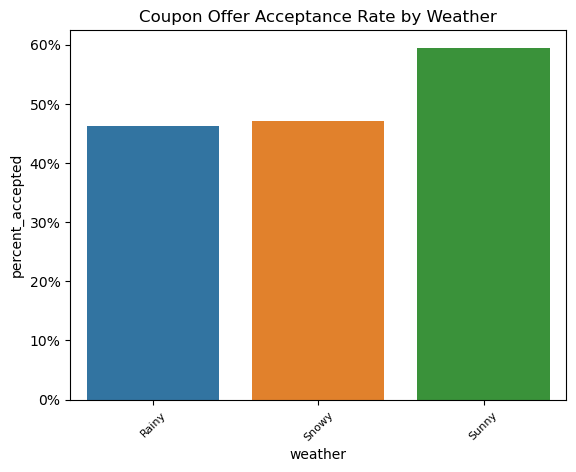


**********************************************************************************

  weather  percent_accepted  num_accepted  count
0   Rainy          0.462810           560   1210
1   Snowy          0.470463           661   1405
2   Sunny          0.594796          5989  10069 None

**********************************************************************************



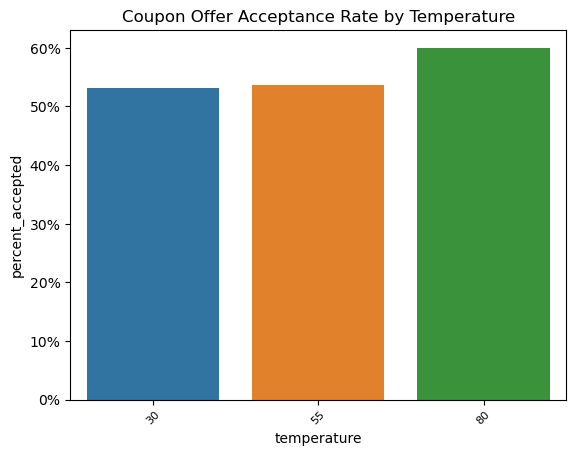


**********************************************************************************

   temperature  percent_accepted  num_accepted  count
0           30          0.531088          1230   2316
1           55          0.536719          2061   3840
2           80          0.600337          3919   6528 None

**********************************************************************************



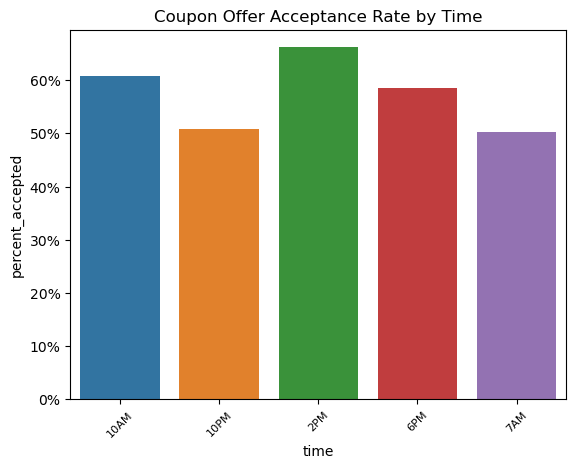


**********************************************************************************

   time  percent_accepted  num_accepted  count
0  10AM          0.608352          1384   2275
1  10PM          0.508475          1020   2006
2   2PM          0.661523          1329   2009
3   6PM          0.584520          1888   3230
4   7AM          0.502212          1589   3164 None

**********************************************************************************



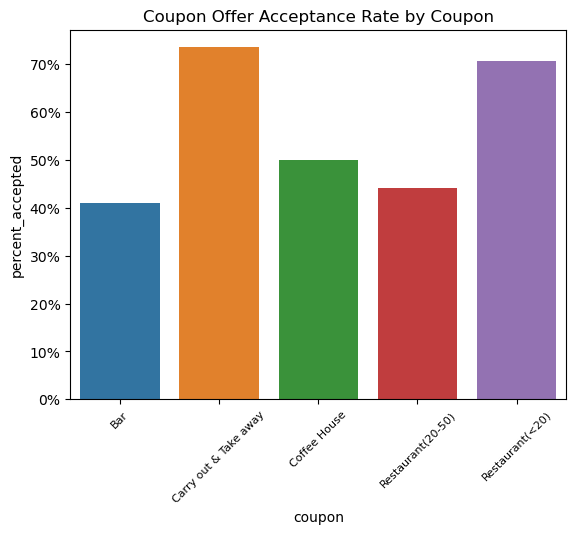


**********************************************************************************

                  coupon  percent_accepted  num_accepted  count
0                    Bar          0.410015           827   2017
1  Carry out & Take away          0.735478          1760   2393
2           Coffee House          0.499249          1995   3996
3      Restaurant(20-50)          0.441019           658   1492
4        Restaurant(<20)          0.707107          1970   2786 None

**********************************************************************************



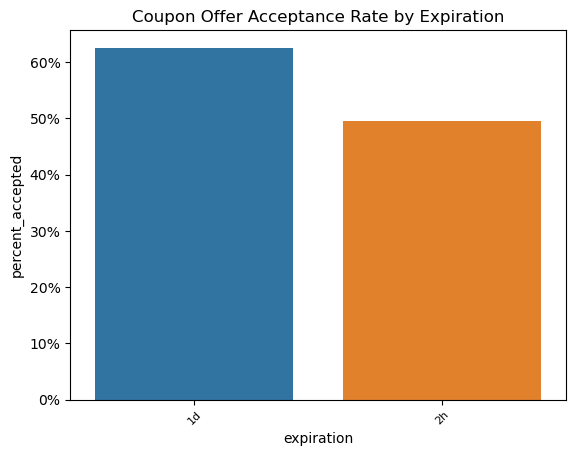


**********************************************************************************

  expiration  percent_accepted  num_accepted  count
0         1d          0.625582          4436   7091
1         2h          0.495977          2774   5593 None

**********************************************************************************



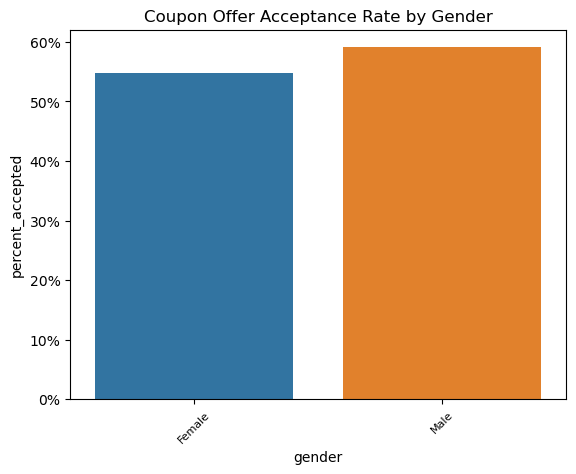


**********************************************************************************

   gender  percent_accepted  num_accepted  count
0  Female          0.547228          3563   6511
1    Male          0.590799          3647   6173 None

**********************************************************************************



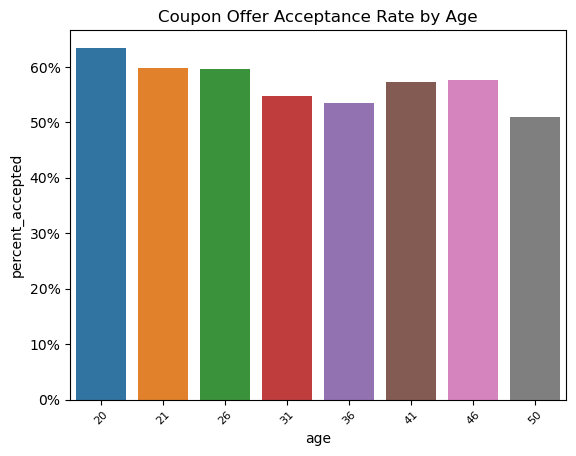


**********************************************************************************

   age  percent_accepted  num_accepted  count
0   20          0.634369           347    547
1   21          0.598191          1587   2653
2   26          0.595936          1525   2559
3   31          0.546346          1114   2039
4   36          0.535254           706   1319
5   41          0.572736           626   1093
6   46          0.575802           395    686
7   50          0.508949           910   1788 None

**********************************************************************************



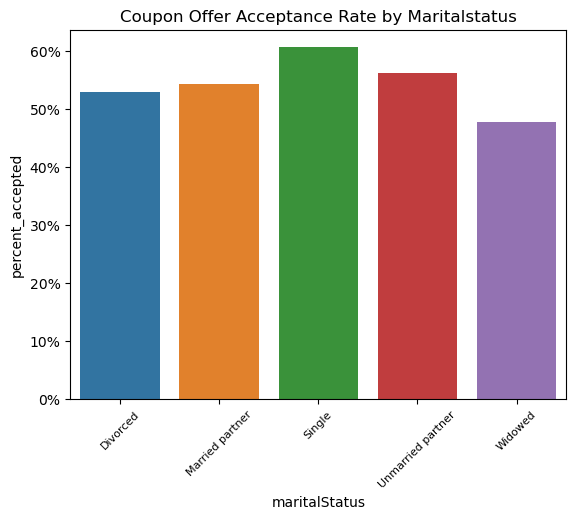


**********************************************************************************

       maritalStatus  percent_accepted  num_accepted  count
0           Divorced          0.529070           273    516
1    Married partner          0.542941          2769   5100
2             Single          0.605850          2879   4752
3  Unmarried partner          0.561299          1227   2186
4            Widowed          0.476923            62    130 None

**********************************************************************************



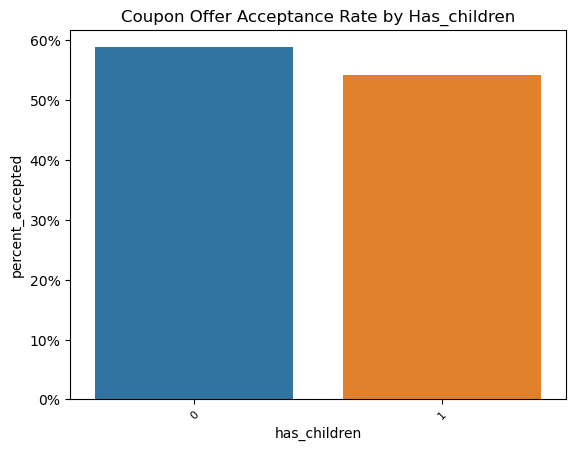


**********************************************************************************

   has_children  percent_accepted  num_accepted  count
0             0          0.587404          4365   7431
1             1          0.541595          2845   5253 None

**********************************************************************************



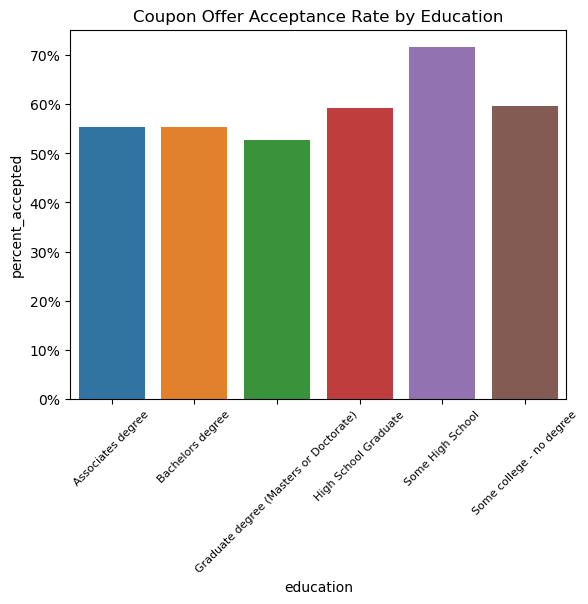


**********************************************************************************

                                education  percent_accepted  num_accepted  \
0                       Associates degree          0.553339           638   
1                        Bachelors degree          0.554325          2403   
2  Graduate degree (Masters or Doctorate)          0.526458           975   
3                    High School Graduate          0.592265           536   
4                        Some High School          0.715909            63   
5                Some college - no degree          0.596415          2595   

   count  
0   1153  
1   4335  
2   1852  
3    905  
4     88  
5   4351   None

**********************************************************************************



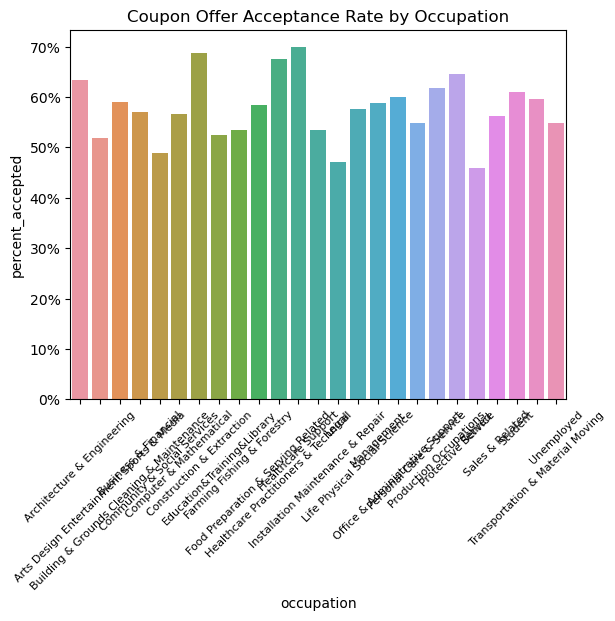


**********************************************************************************

                                   occupation  percent_accepted  num_accepted  \
0                  Architecture & Engineering          0.634286           111   
1    Arts Design Entertainment Sports & Media          0.518283           326   
2   Building & Grounds Cleaning & Maintenance          0.590909            26   
3                        Business & Financial          0.569853           310   
4                 Community & Social Services          0.489627           118   
5                     Computer & Mathematical          0.566761           798   
6                   Construction & Extraction          0.688312           106   
7                  Education&Training&Library          0.523860           494   
8                  Farming Fishing & Forestry          0.534884            23   
9          Food Preparation & Serving Related          0.583893           174   
10       Healthcare Prac

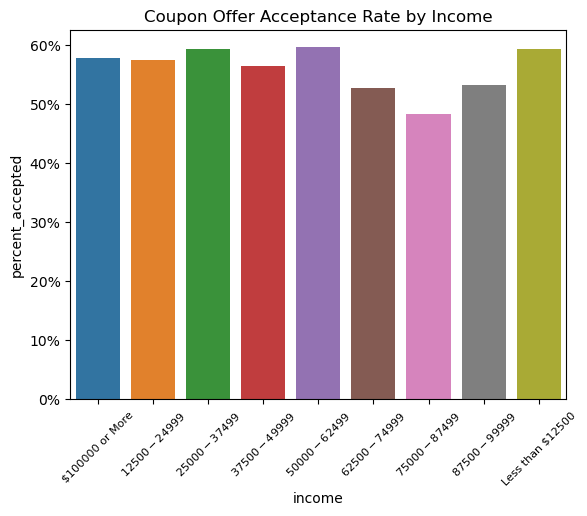


**********************************************************************************

             income  percent_accepted  num_accepted  count
0   $100000 or More          0.578341          1004   1736
1   $12500 - $24999          0.574549          1052   1831
2   $25000 - $37499          0.593145          1194   2013
3   $37500 - $49999          0.563989          1018   1805
4   $50000 - $62499          0.595539           988   1659
5   $62500 - $74999          0.527187           446    846
6   $75000 - $87499          0.483081           414    857
7   $87500 - $99999          0.531844           476    895
8  Less than $12500          0.593090           618   1042 None

**********************************************************************************



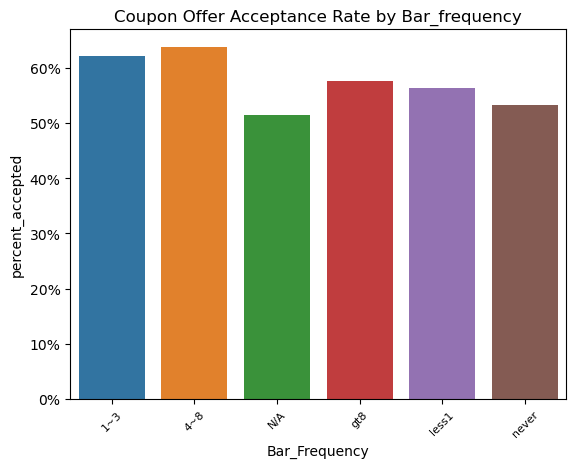


**********************************************************************************

  Bar_Frequency  percent_accepted  num_accepted  count
0           1~3          0.621917          1538   2473
1           4~8          0.637546           686   1076
2           N/A          0.514019            55    107
3           gt8          0.575931           201    349
4         less1          0.563756          1963   3482
5         never          0.532423          2767   5197 None

**********************************************************************************



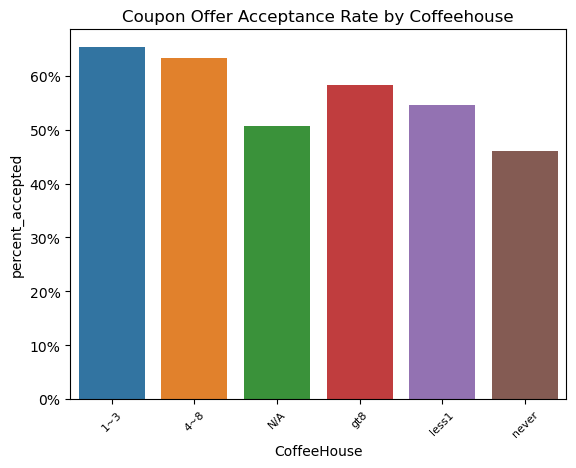


**********************************************************************************

  CoffeeHouse  percent_accepted  num_accepted  count
0         1~3          0.653953          2109   3225
1         4~8          0.633408          1130   1784
2         N/A          0.506912           110    217
3         gt8          0.583258           648   1111
4       less1          0.546824          1851   3385
5       never          0.459824          1362   2962 None

**********************************************************************************



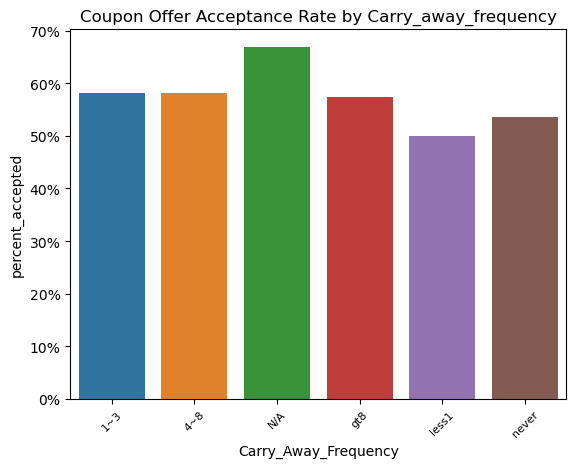


**********************************************************************************

  Carry_Away_Frequency  percent_accepted  num_accepted  count
0                  1~3          0.580479          2712   4672
1                  4~8          0.581024          2474   4258
2                  N/A          0.668874           101    151
3                  gt8          0.573400           914   1594
4                less1          0.499461           927   1856
5                never          0.535948            82    153 None

**********************************************************************************



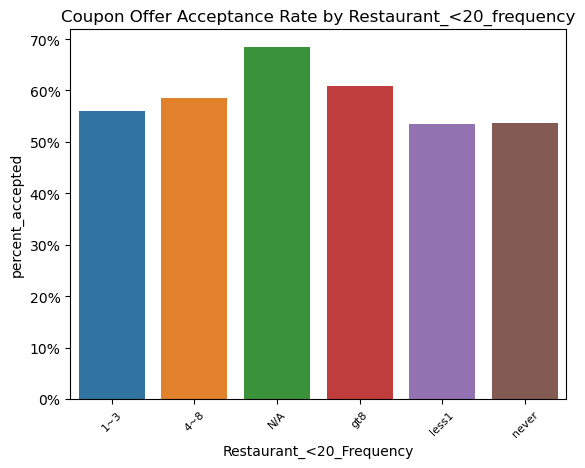


**********************************************************************************

  Restaurant_<20_Frequency  percent_accepted  num_accepted  count
0                      1~3          0.559896          3010   5376
1                      4~8          0.584637          2093   3580
2                      N/A          0.684615            89    130
3                      gt8          0.607782           781   1285
4                    less1          0.534639          1119   2093
5                    never          0.536364           118    220 None

**********************************************************************************



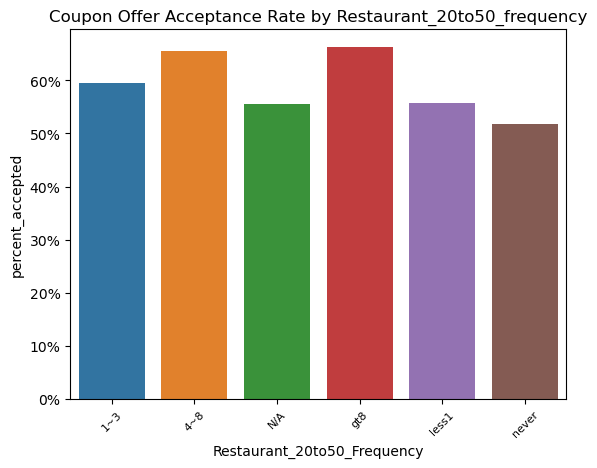


**********************************************************************************

  Restaurant_20to50_Frequency  percent_accepted  num_accepted  count
0                         1~3          0.595137          1958   3290
1                         4~8          0.655220           477    728
2                         N/A          0.555556           105    189
3                         gt8          0.662879           175    264
4                       less1          0.557841          3390   6077
5                       never          0.517322          1105   2136 None

**********************************************************************************



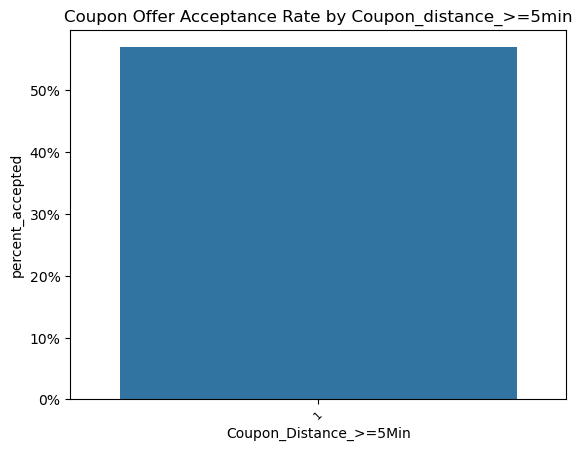


**********************************************************************************

   Coupon_Distance_>=5Min  percent_accepted  num_accepted  count
0                       1          0.568433          7210  12684 None

**********************************************************************************



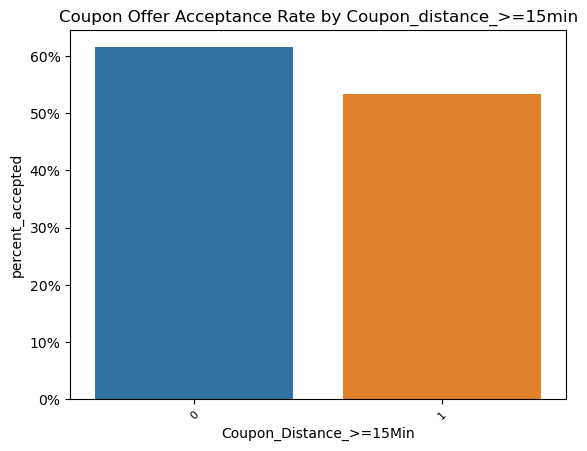


**********************************************************************************

   Coupon_Distance_>=15Min  percent_accepted  num_accepted  count
0                        0          0.614168          3416   5562
1                        1          0.532716          3794   7122 None

**********************************************************************************



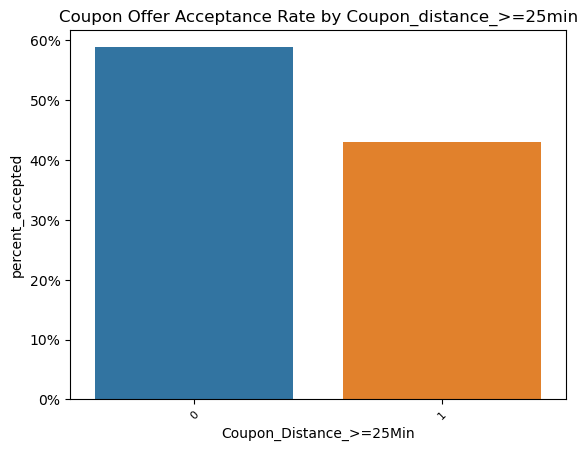


**********************************************************************************

   Coupon_Distance_>=25Min  percent_accepted  num_accepted  count
0                        0          0.587309          6562  11173
1                        1          0.428855           648   1511 None

**********************************************************************************



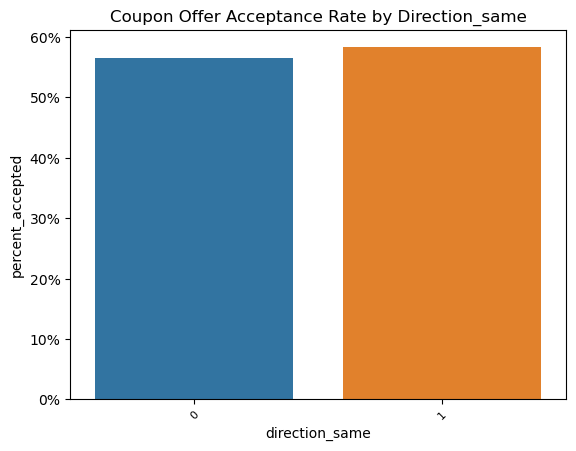


**********************************************************************************

   direction_same  percent_accepted  num_accepted  count
0               0          0.564659          5624   9960
1               1          0.582232          1586   2724 None

**********************************************************************************



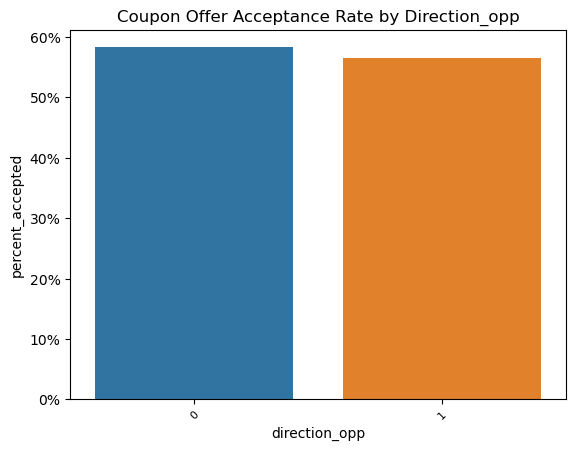


**********************************************************************************

   direction_opp  percent_accepted  num_accepted  count
0              0          0.582232          1586   2724
1              1          0.564659          5624   9960 None

**********************************************************************************



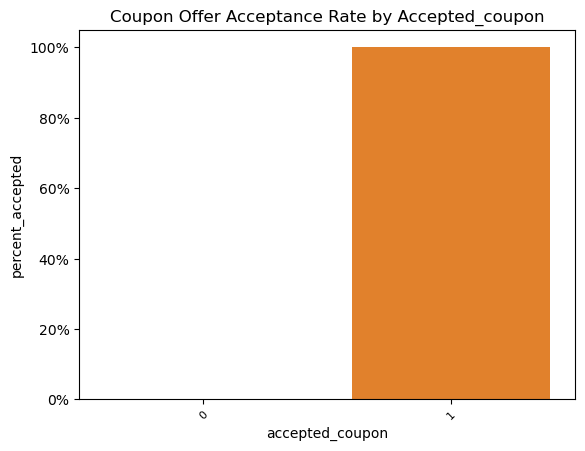


**********************************************************************************

   accepted_coupon  percent_accepted  num_accepted  count
0                0               0.0             0   5474
1                1               1.0          7210   7210 None

**********************************************************************************



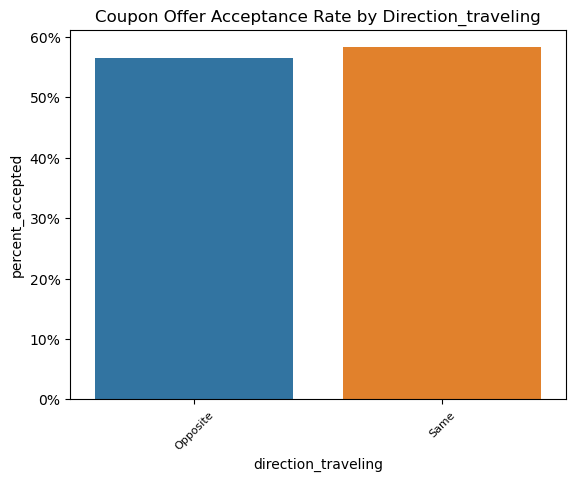


**********************************************************************************

  direction_traveling  percent_accepted  num_accepted  count
0            Opposite          0.564659          5624   9960
1                Same          0.582232          1586   2724 None

**********************************************************************************



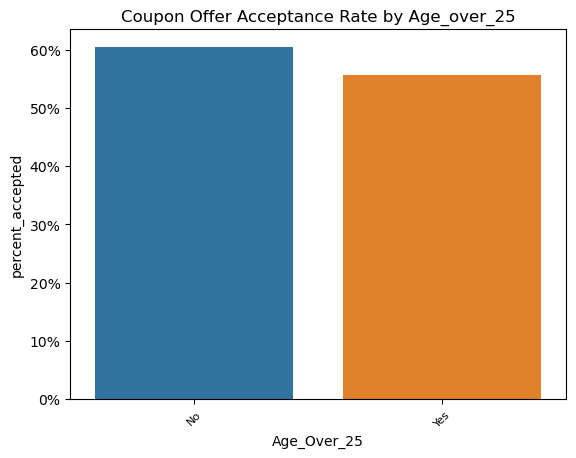


**********************************************************************************

  Age_Over_25  percent_accepted  num_accepted  count
0          No          0.604375          1934   3200
1         Yes          0.556305          5276   9484 None

**********************************************************************************



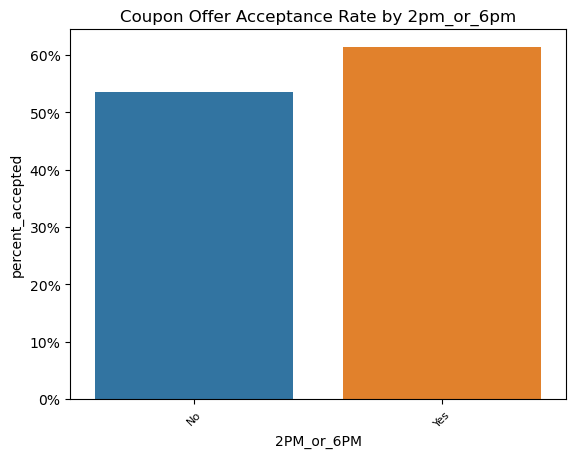


**********************************************************************************

  2PM_or_6PM  percent_accepted  num_accepted  count
0         No          0.536333          3993   7445
1        Yes          0.614048          3217   5239 None

**********************************************************************************



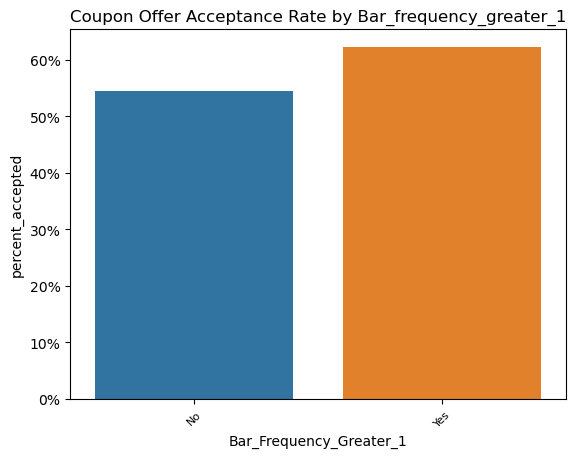


**********************************************************************************

  Bar_Frequency_Greater_1  percent_accepted  num_accepted  count
0                      No          0.544616          4785   8786
1                     Yes          0.622114          2425   3898 None

**********************************************************************************



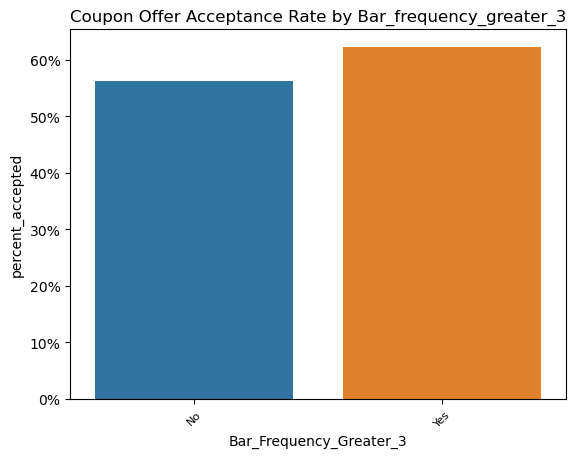


**********************************************************************************

  Bar_Frequency_Greater_3  percent_accepted  num_accepted  count
0                      No          0.561595          6323  11259
1                     Yes          0.622456           887   1425 None

**********************************************************************************



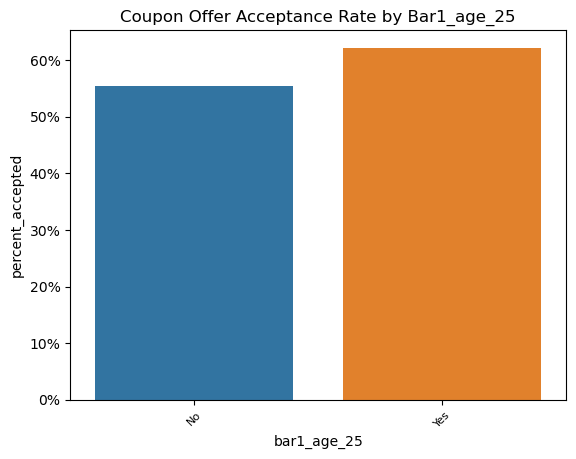


**********************************************************************************

  bar1_age_25  percent_accepted  num_accepted  count
0          No          0.553548          5484   9907
1         Yes          0.621534          1726   2777 None

**********************************************************************************



In [870]:
for col in cleaned_data.columns:
    group_percentages(cleaned_data,col)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [871]:
bar_coupon_df = cleaned_data.query('coupon == "Bar"')
bar_coupon_df.head(5)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar_Frequency,CoffeeHouse,Carry_Away_Frequency,Restaurant_<20_Frequency,Restaurant_20to50_Frequency,Coupon_Distance_>=5Min,Coupon_Distance_>=15Min,Coupon_Distance_>=25Min,direction_same,direction_opp,accepted_coupon,direction_traveling,Age_Over_25,2PM_or_6PM,Bar_Frequency_Greater_1,Bar_Frequency_Greater_3,bar1_age_25
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,N/A,4~8,1~3,1,1,0,0,1,0,Opposite,No,No,No,No,No
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,N/A,4~8,1~3,1,0,0,1,0,1,Same,No,Yes,No,No,No
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,N/A,4~8,1~3,1,1,1,0,1,0,Opposite,No,No,No,No,No
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1,Opposite,No,No,No,No,No
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1,Same,No,Yes,No,No,No


2. What proportion of bar coupons were accepted?

* 58% of bar coupons were accepted.


In [872]:
bar_percent_accepted = bar_coupon_df['accepted_coupon'].value_counts(normalize=True)
bar_percent_accepted = bar_percent_accepted.reset_index()
bar_percent_accepted.columns=['accepted_coupon','percent']
bar_percent_accepted

,accepted_coupon,percent
0,0,0.589985
1,1,0.410015


### Acceptance Rates by Column for Bar Coupon Dataset

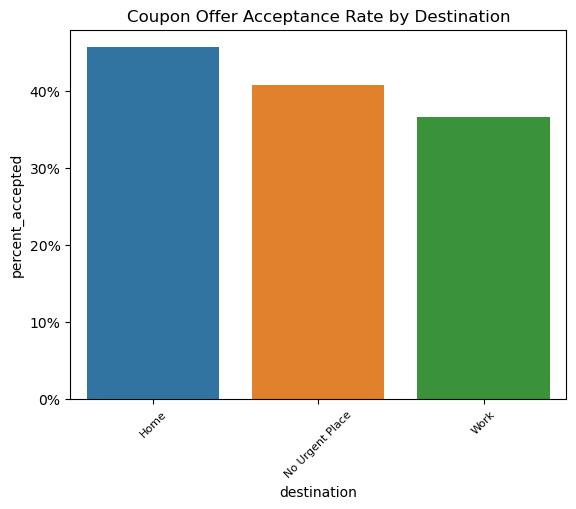


**********************************************************************************

       destination  percent_accepted  num_accepted  count
0             Home          0.456522           231    506
1  No Urgent Place          0.408203           418   1024
2             Work          0.365503           178    487 None

**********************************************************************************



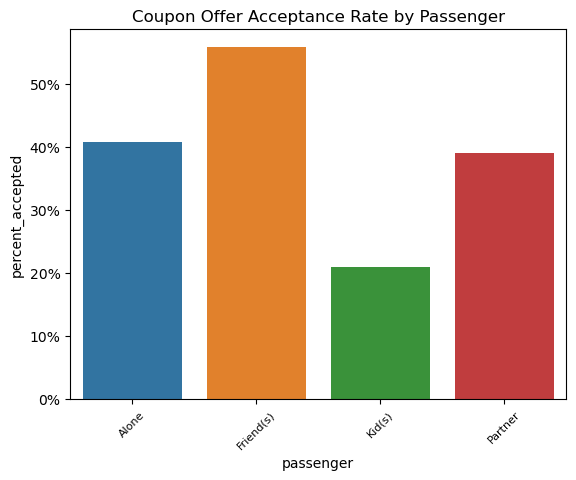


**********************************************************************************

   passenger  percent_accepted  num_accepted  count
0      Alone          0.407500           489   1200
1  Friend(s)          0.557864           188    337
2     Kid(s)          0.208738            43    206
3    Partner          0.390511           107    274 None

**********************************************************************************



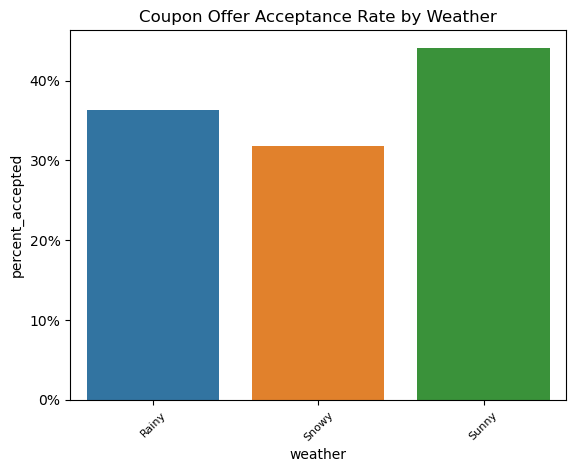


**********************************************************************************

  weather  percent_accepted  num_accepted  count
0   Rainy          0.362791           156    430
1   Snowy          0.317992            76    239
2   Sunny          0.441395           595   1348 None

**********************************************************************************



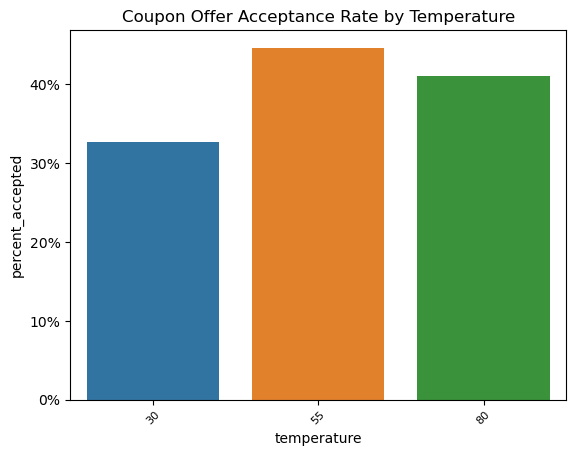


**********************************************************************************

   temperature  percent_accepted  num_accepted  count
0           30          0.326291           139    426
1           55          0.446653           427    956
2           80          0.411024           261    635 None

**********************************************************************************



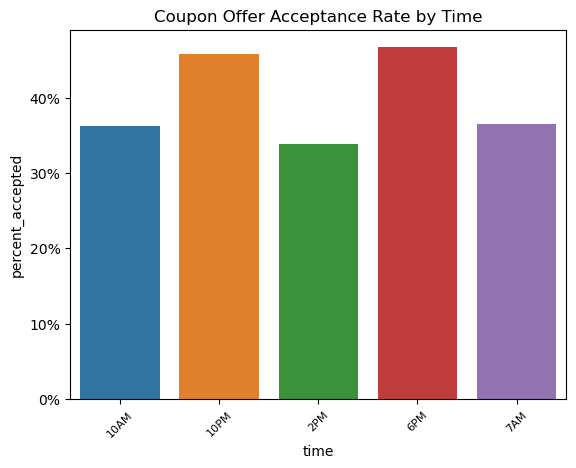


**********************************************************************************

   time  percent_accepted  num_accepted  count
0  10AM          0.362613           161    444
1  10PM          0.457711           184    402
2   2PM          0.338983            40    118
3   6PM          0.466431           264    566
4   7AM          0.365503           178    487 None

**********************************************************************************



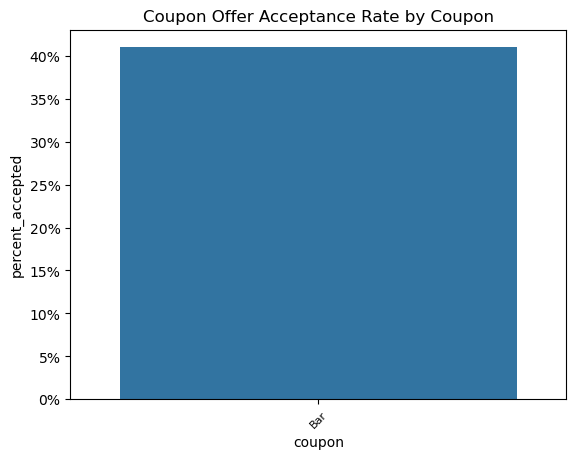


**********************************************************************************

  coupon  percent_accepted  num_accepted  count
0    Bar          0.410015           827   2017 None

**********************************************************************************



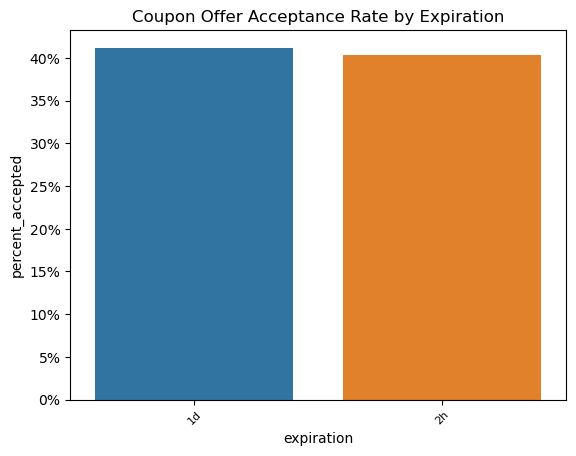


**********************************************************************************

  expiration  percent_accepted  num_accepted  count
0         1d          0.411954           641   1556
1         2h          0.403471           186    461 None

**********************************************************************************



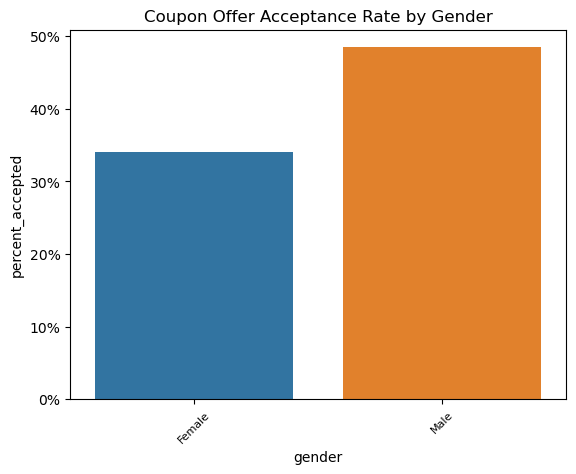


**********************************************************************************

   gender  percent_accepted  num_accepted  count
0  Female          0.340670           356   1045
1    Male          0.484568           471    972 None

**********************************************************************************



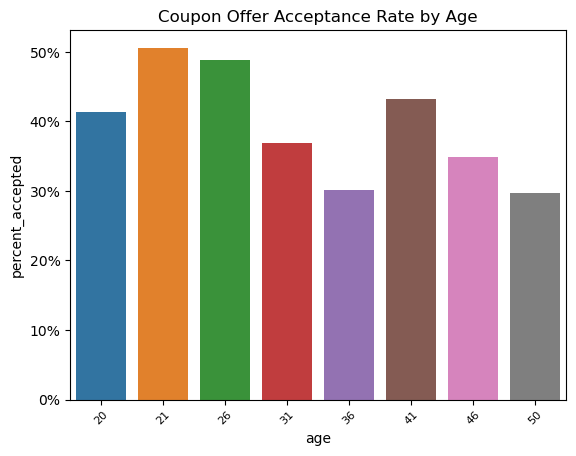


**********************************************************************************

   age  percent_accepted  num_accepted  count
0   20          0.413793            36     87
1   21          0.505995           211    417
2   26          0.488608           193    395
3   31          0.368732           125    339
4   36          0.301435            63    209
5   41          0.432584            77    178
6   46          0.348624            38    109
7   50          0.296820            84    283 None

**********************************************************************************



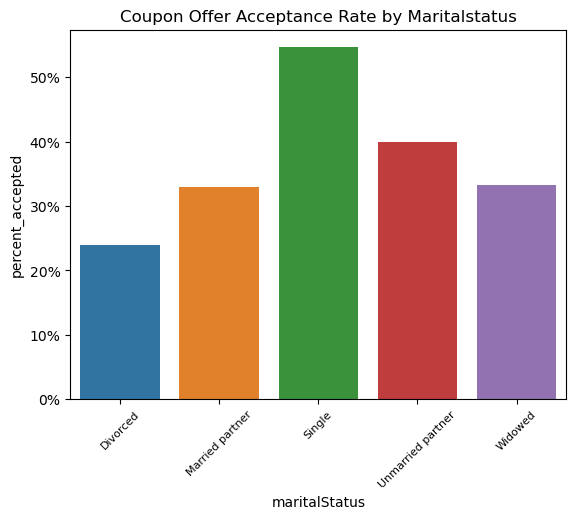


**********************************************************************************

       maritalStatus  percent_accepted  num_accepted  count
0           Divorced          0.240000            18     75
1    Married partner          0.328798           290    882
2             Single          0.546142           361    661
3  Unmarried partner          0.399471           151    378
4            Widowed          0.333333             7     21 None

**********************************************************************************



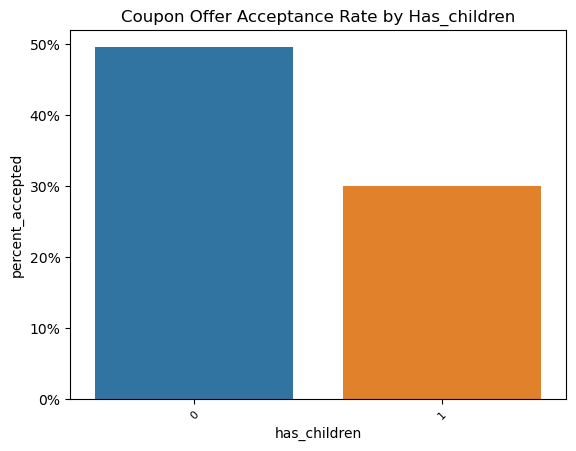


**********************************************************************************

   has_children  percent_accepted  num_accepted  count
0             0          0.494746           565   1142
1             1          0.299429           262    875 None

**********************************************************************************



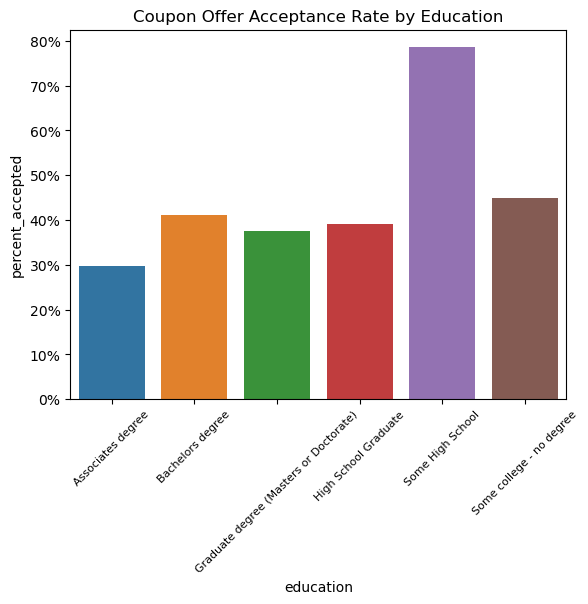


**********************************************************************************

                                education  percent_accepted  num_accepted  \
0                       Associates degree          0.296875            57   
1                        Bachelors degree          0.410819           281   
2  Graduate degree (Masters or Doctorate)          0.376384           102   
3                    High School Graduate          0.391892            58   
4                        Some High School          0.785714            11   
5                Some college - no degree          0.449153           318   

   count  
0    192  
1    684  
2    271  
3    148  
4     14  
5    708   None

**********************************************************************************



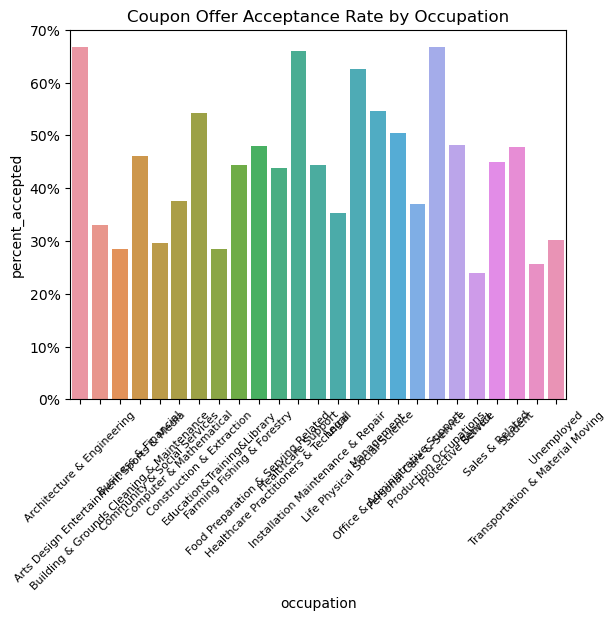


**********************************************************************************

                                   occupation  percent_accepted  num_accepted  \
0                  Architecture & Engineering          0.666667            18   
1    Arts Design Entertainment Sports & Media          0.330000            33   
2   Building & Grounds Cleaning & Maintenance          0.285714             2   
3                        Business & Financial          0.460674            41   
4                 Community & Social Services          0.295455            13   
5                     Computer & Mathematical          0.375000            87   
6                   Construction & Extraction          0.541667            13   
7                  Education&Training&Library          0.285714            40   
8                  Farming Fishing & Forestry          0.444444             4   
9          Food Preparation & Serving Related          0.479167            23   
10       Healthcare Prac

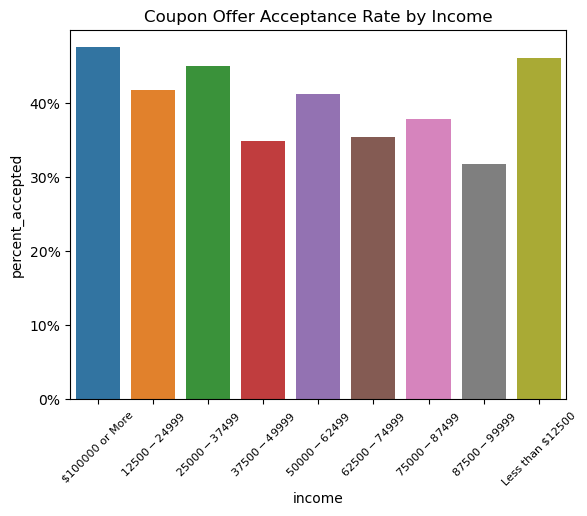


**********************************************************************************

             income  percent_accepted  num_accepted  count
0   $100000 or More          0.474227           138    291
1   $12500 - $24999          0.416667           120    288
2   $25000 - $37499          0.449686           143    318
3   $37500 - $49999          0.348315            93    267
4   $50000 - $62499          0.412214           108    262
5   $62500 - $74999          0.353846            46    130
6   $75000 - $87499          0.377483            57    151
7   $87500 - $99999          0.317241            46    145
8  Less than $12500          0.460606            76    165 None

**********************************************************************************



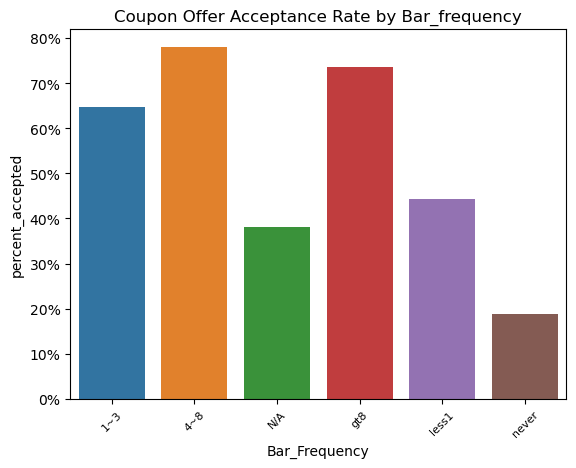


**********************************************************************************

  Bar_Frequency  percent_accepted  num_accepted  count
0           1~3          0.647355           257    397
1           4~8          0.780000           117    150
2           N/A          0.380952             8     21
3           gt8          0.734694            36     49
4         less1          0.443860           253    570
5         never          0.187952           156    830 None

**********************************************************************************



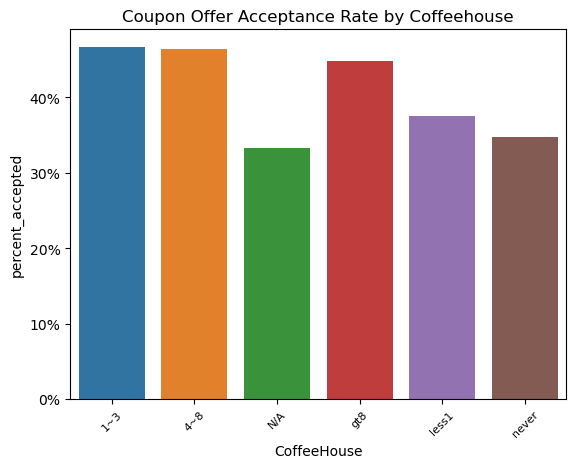


**********************************************************************************

  CoffeeHouse  percent_accepted  num_accepted  count
0         1~3          0.467066           234    501
1         4~8          0.463918           135    291
2         N/A          0.333333            13     39
3         gt8          0.448276            78    174
4       less1          0.375228           206    549
5       never          0.347732           161    463 None

**********************************************************************************



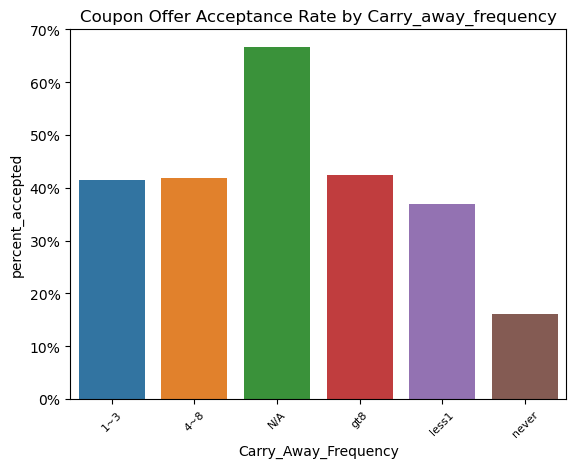


**********************************************************************************

  Carry_Away_Frequency  percent_accepted  num_accepted  count
0                  1~3          0.414305           307    741
1                  4~8          0.417910           280    670
2                  N/A          0.666667            16     24
3                  gt8          0.424710           110    259
4                less1          0.369128           110    298
5                never          0.160000             4     25 None

**********************************************************************************



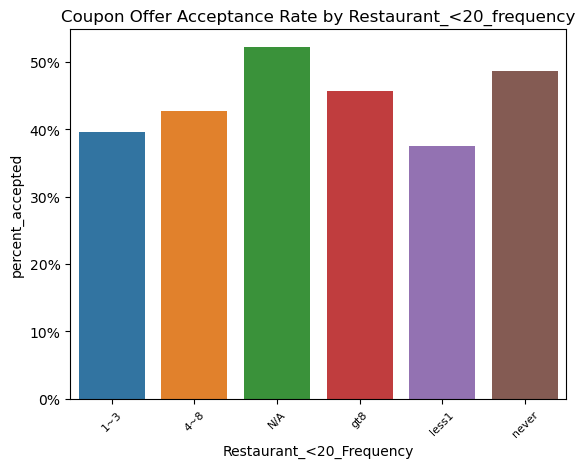


**********************************************************************************

  Restaurant_<20_Frequency  percent_accepted  num_accepted  count
0                      1~3          0.396355           348    878
1                      4~8          0.426056           242    568
2                      N/A          0.521739            12     23
3                      gt8          0.456989            85    186
4                    less1          0.375385           122    325
5                    never          0.486486            18     37 None

**********************************************************************************



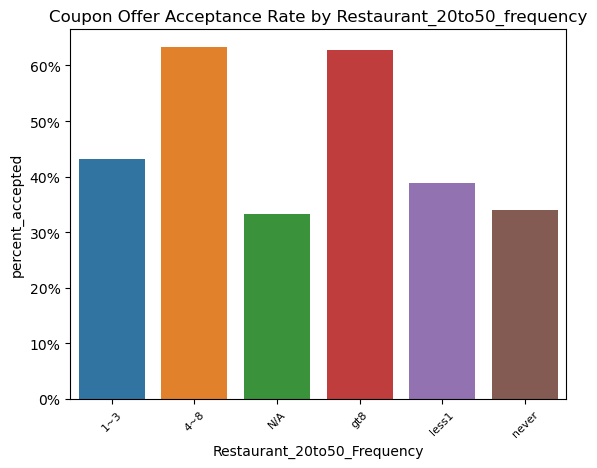


**********************************************************************************

  Restaurant_20to50_Frequency  percent_accepted  num_accepted  count
0                         1~3          0.431520           230    533
1                         4~8          0.633333            76    120
2                         N/A          0.333333            12     36
3                         gt8          0.628571            22     35
4                       less1          0.387984           381    982
5                       never          0.340836           106    311 None

**********************************************************************************



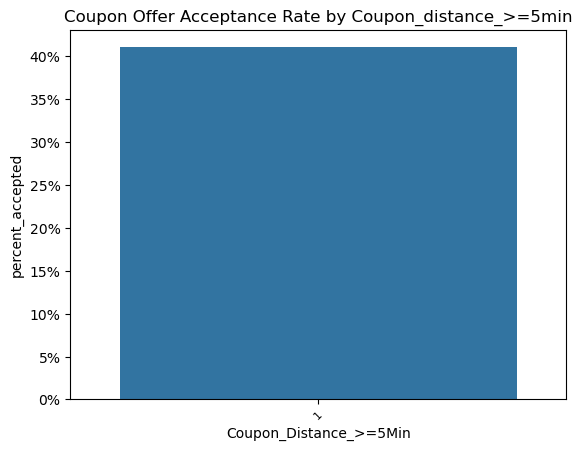


**********************************************************************************

   Coupon_Distance_>=5Min  percent_accepted  num_accepted  count
0                       1          0.410015           827   2017 None

**********************************************************************************



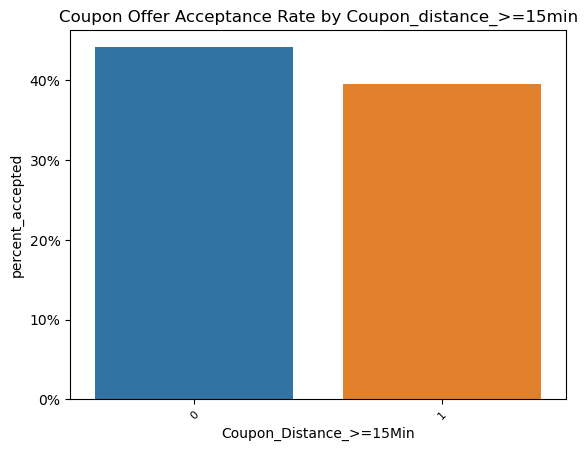


**********************************************************************************

   Coupon_Distance_>=15Min  percent_accepted  num_accepted  count
0                        0          0.440353           299    679
1                        1          0.394619           528   1338 None

**********************************************************************************



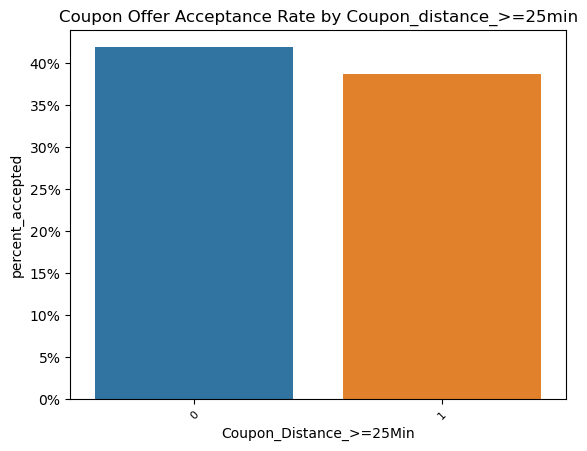


**********************************************************************************

   Coupon_Distance_>=25Min  percent_accepted  num_accepted  count
0                        0          0.418049           630   1507
1                        1          0.386275           197    510 None

**********************************************************************************



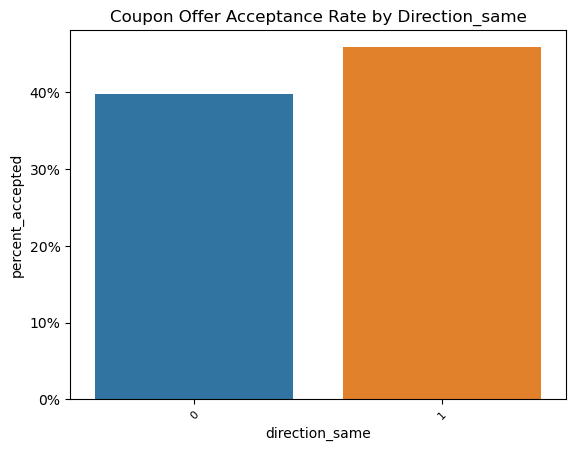


**********************************************************************************

   direction_same  percent_accepted  num_accepted  count
0               0          0.397492           634   1595
1               1          0.457346           193    422 None

**********************************************************************************



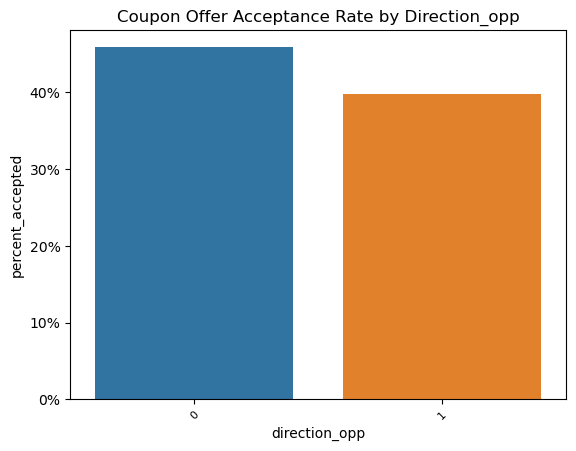


**********************************************************************************

   direction_opp  percent_accepted  num_accepted  count
0              0          0.457346           193    422
1              1          0.397492           634   1595 None

**********************************************************************************



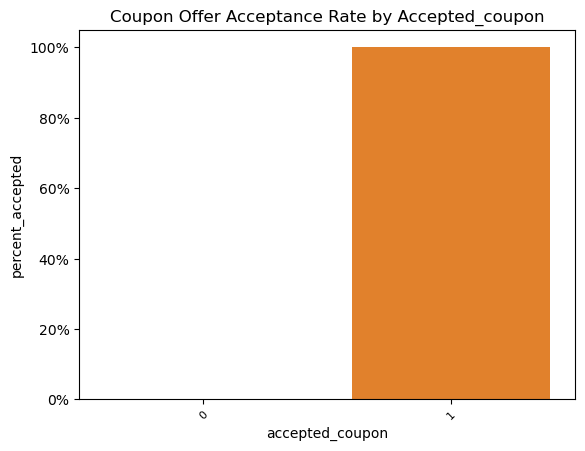


**********************************************************************************

   accepted_coupon  percent_accepted  num_accepted  count
0                0               0.0             0   1190
1                1               1.0           827    827 None

**********************************************************************************



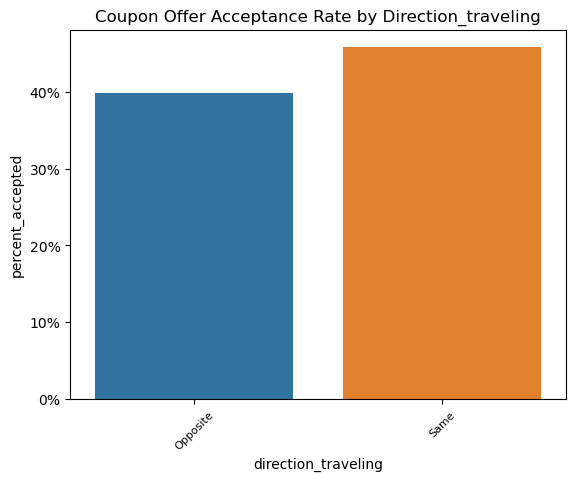


**********************************************************************************

  direction_traveling  percent_accepted  num_accepted  count
0            Opposite          0.397492           634   1595
1                Same          0.457346           193    422 None

**********************************************************************************



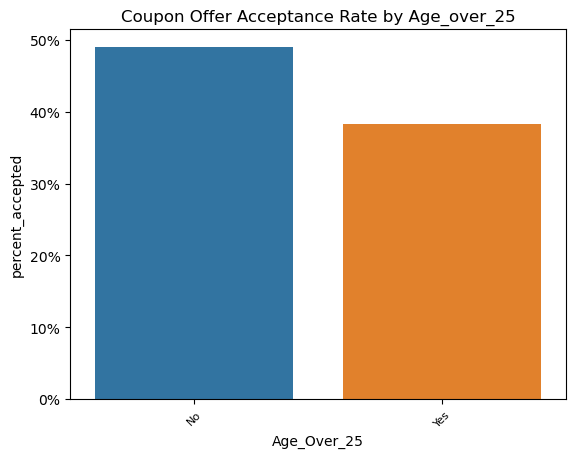


**********************************************************************************

  Age_Over_25  percent_accepted  num_accepted  count
0          No          0.490079           247    504
1         Yes          0.383344           580   1513 None

**********************************************************************************



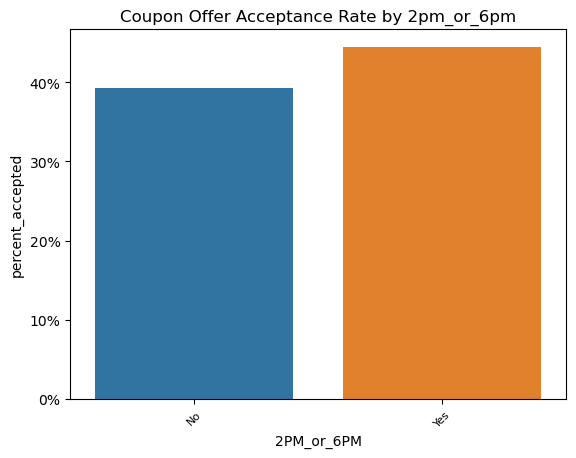


**********************************************************************************

  2PM_or_6PM  percent_accepted  num_accepted  count
0         No          0.392348           523   1333
1        Yes          0.444444           304    684 None

**********************************************************************************



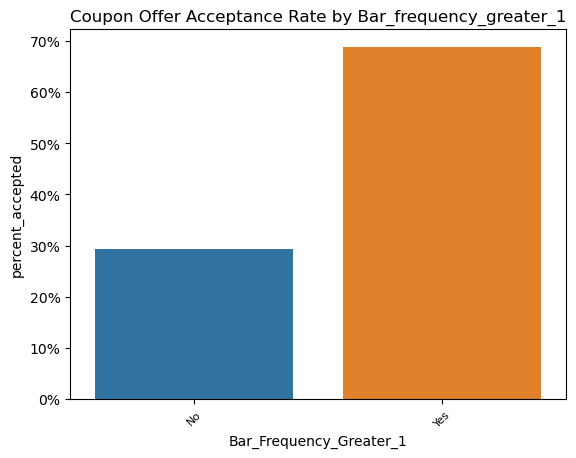


**********************************************************************************

  Bar_Frequency_Greater_1  percent_accepted  num_accepted  count
0                      No          0.293455           417   1421
1                     Yes          0.687919           410    596 None

**********************************************************************************



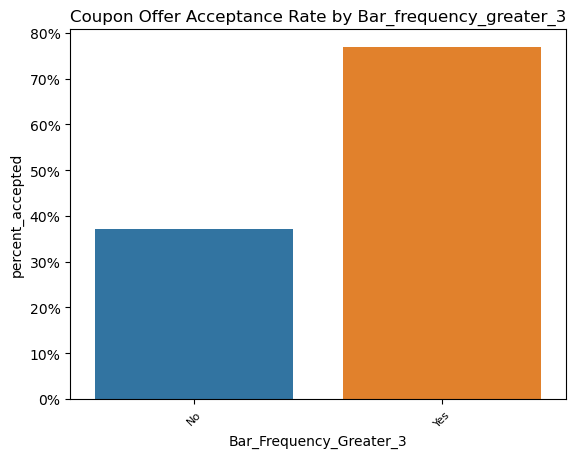


**********************************************************************************

  Bar_Frequency_Greater_3  percent_accepted  num_accepted  count
0                      No          0.370737           674   1818
1                     Yes          0.768844           153    199 None

**********************************************************************************



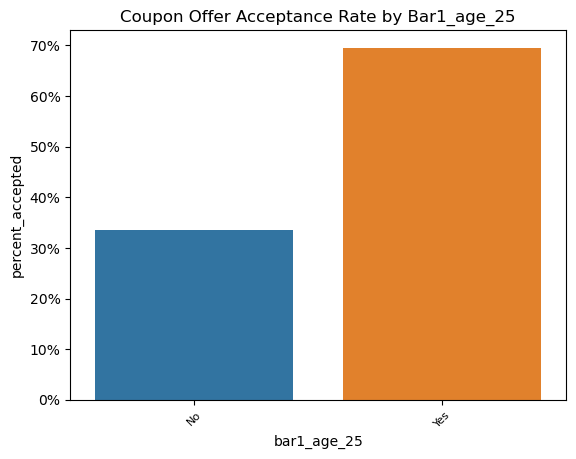


**********************************************************************************

  bar1_age_25  percent_accepted  num_accepted  count
0          No          0.335003           535   1597
1         Yes          0.695238           292    420 None

**********************************************************************************



In [873]:
for col in bar_coupon_df.columns:
    group_percentages(bar_coupon_df,col)

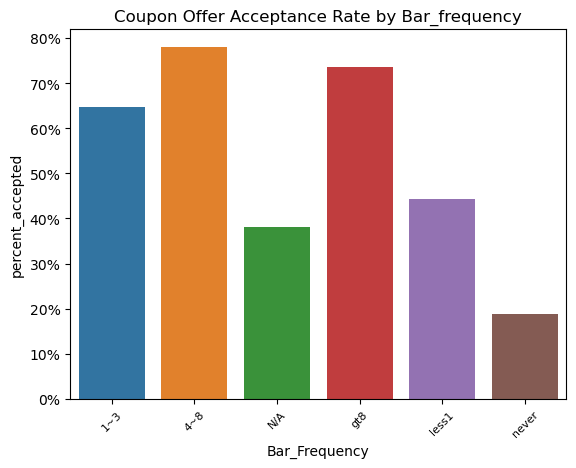


**********************************************************************************

  Bar_Frequency  percent_accepted  num_accepted  count
0           1~3          0.647355           257    397
1           4~8          0.780000           117    150
2           N/A          0.380952             8     21
3           gt8          0.734694            36     49
4         less1          0.443860           253    570
5         never          0.187952           156    830 None

**********************************************************************************



In [874]:
group_percentages(bar_coupon_df, 'Bar_Frequency')

In [875]:
bar_coupon_df.head(3)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar_Frequency,CoffeeHouse,Carry_Away_Frequency,Restaurant_<20_Frequency,Restaurant_20to50_Frequency,Coupon_Distance_>=5Min,Coupon_Distance_>=15Min,Coupon_Distance_>=25Min,direction_same,direction_opp,accepted_coupon,direction_traveling,Age_Over_25,2PM_or_6PM,Bar_Frequency_Greater_1,Bar_Frequency_Greater_3,bar1_age_25
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,N/A,4~8,1~3,1,1,0,0,1,0,Opposite,No,No,No,No,No
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,N/A,4~8,1~3,1,0,0,1,0,1,Same,No,Yes,No,No,No
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,N/A,4~8,1~3,1,1,1,0,1,0,Opposite,No,No,No,No,No


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


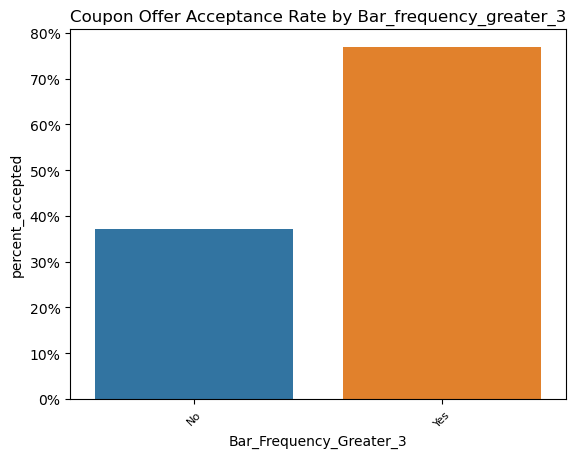


**********************************************************************************

  Bar_Frequency_Greater_3  percent_accepted  num_accepted  count
0                      No          0.370737           674   1818
1                     Yes          0.768844           153    199 None

**********************************************************************************



In [876]:
group_percentages(df=bar_coupon_df, cols='Bar_Frequency_Greater_3')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

* Yes, acceptance rates are almost 70% if over 25 and have gone to the bar more than once.


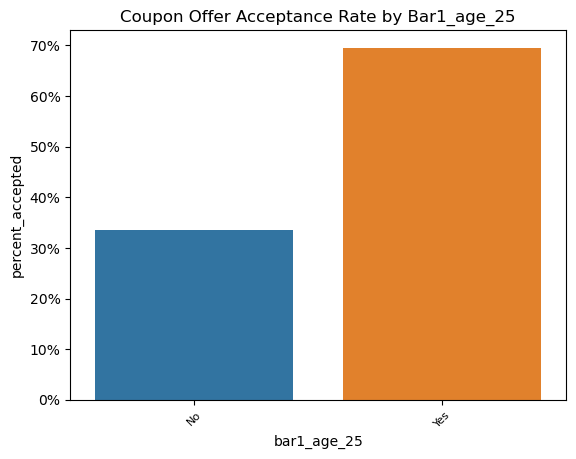


**********************************************************************************

  bar1_age_25  percent_accepted  num_accepted  count
0          No          0.335003           535   1597
1         Yes          0.695238           292    420 None

**********************************************************************************



In [877]:
group_percentages(df=bar_coupon_df, cols='bar1_age_25')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [878]:
# creating list for occupations to exclude.
occ_exclude = ['Farming Fishing & Forestry']

# go to bars more than once a month and had passengers that were not a kid
bar_no_kid_passenger = bar_coupon_df.query("Bar_Frequency in @bar1 and passenger != 'Kid(s)'").groupby('accepted_coupon').count()['destination'].reset_index().rename(columns={'destination':'bar_no_kid_passenger'})

#occupations other than farming, fishing, or forestry
bar_no_farmer = bar_coupon_df.query("occupation not in @occ_exclude").groupby('accepted_coupon').count()['destination'].reset_index().rename(columns={'destination':'bar_no_farmer'})

bar_compare = bar_no_kid_passenger.merge(right=bar_no_farmer,left_on='accepted_coupon', right_on='accepted_coupon' )

for col in bar_compare.columns[1:]:
    total = bar_compare[col].sum()
    bar_compare[f'{col}_percentage'] = (bar_compare[col] / total) * 100

bar_compare

,accepted_coupon,bar_no_kid_passenger,bar_no_farmer,bar_no_kid_passenger_percentage,bar_no_farmer_percentage
0,0,158,1185,28.675136,59.013944
1,1,393,823,71.324864,40.986056


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [879]:
# Answering question 6.

# Creating lists for categorizing income less than 50K and go to cheap restaurants more than 4 times a month.
income_tiers_less50 = ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']
restaurant_less20_4ormore = ['4~8','gt8']

# go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_no_kid_passenger_notwidow = bar_coupon_df.query("Bar_Frequency in @bar1 and passenger != 'Kid(s)' and maritalStatus != 'Widowed'").groupby('accepted_coupon').count()['destination'].reset_index().rename(columns={'destination':'bar_no_kid_passenger_notwidowed'})

# go to bars more than once a month and are under the age of 30
bar_under_30 = bar_coupon_df.query("age < 30").groupby('accepted_coupon').count()['destination'].reset_index().rename(columns={'destination':'bar_under_30'})

# go to cheap restaurants more than 4 times a month and income is less than 50K
bar_cheap_rest = bar_coupon_df.query("income in @income_tiers_less50 and `Restaurant_<20_Frequency` in @restaurant_less20_4ormore").groupby('accepted_coupon').count()['destination'].reset_index().rename(columns={'destination':'income_under_50K_cheap_rest_4'})

bar_compare2 = bar_no_kid_passenger_notwidow.merge(right=bar_under_30,left_on='accepted_coupon', right_on='accepted_coupon' )
bar_compare2 = bar_compare2.merge(right=bar_cheap_rest,left_on='accepted_coupon', right_on='accepted_coupon' )                             

for col in bar_compare2.columns[1:]:
    total = bar_compare2[col].sum()
    bar_compare2[f'{col}_percentage'] = (bar_compare2[col] / total) * 100

bar_compare2

,accepted_coupon,bar_no_kid_passenger_notwidowed,bar_under_30,income_under_50K_cheap_rest_4,bar_no_kid_passenger_notwidowed_percentage,bar_under_30_percentage,income_under_50K_cheap_rest_4_percentage
0,0,158,459,188,28.675136,51.05673,54.651163
1,1,393,440,156,71.324864,48.94327,45.348837


In [880]:
bar_transpose = bar_compare2[['bar_no_kid_passenger_notwidowed_percentage',
                              'bar_under_30_percentage',
                              'income_under_50K_cheap_rest_4_percentage']].transpose()

bar_transpose

,0,1
bar_no_kid_passenger_notwidowed_percentage,28.675136,71.324864
bar_under_30_percentage,51.056730,48.943270
income_under_50K_cheap_rest_4_percentage,54.651163,45.348837


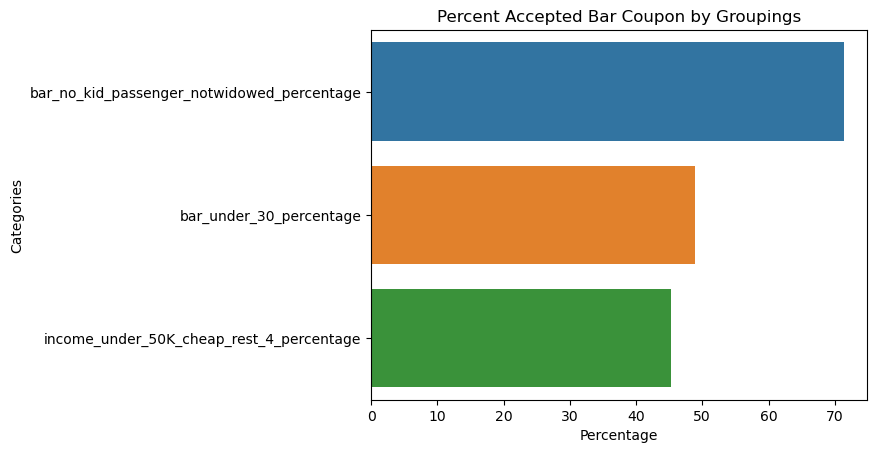

In [881]:
sns.barplot(x=bar_transpose[1], y=bar_transpose.index)
plt.title('Percent Accepted Bar Coupon by Groupings')
plt.xlabel('Percentage')
plt.ylabel('Categories')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

* They do not have kids and they are not widowed.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Running Data on the Coupon Group "Carry out & Take away"

* Created a dataframe for just "Carry out & Take away".
* Overall acceptance rate was 73%.
* Ran columns through chart function to view highest acceptance rate by feature.

* Highest acceptance rates occur:
 * if there is a friend, 
 * on sunny days,
 * when temperature is 30 degrees,
 * at 2pm,
 * with coupon expiration in one day,
 * to males,
 * with some high school education
 
 * Looked at acceptance rates by male or female with a friend during and off peak times.  Peak is 2PM and 6PM.
  * 


In [882]:
# Creating a dataframe for coupon = 'Carry out and Take away' 

carry_out_coupon_df = cleaned_data.query("coupon == 'Carry out & Take away'")



In [883]:
# Acceptance Rates for Overall Carry out & Take away


carry_out_accepted = carry_out_coupon_df['accepted_coupon'].value_counts(normalize=True)
carry_out_accepted = carry_out_accepted.reset_index()
carry_out_accepted.columns=['accepted_coupon','percent']
carry_out_accepted

,accepted_coupon,percent
0,1,0.735478
1,0,0.264522


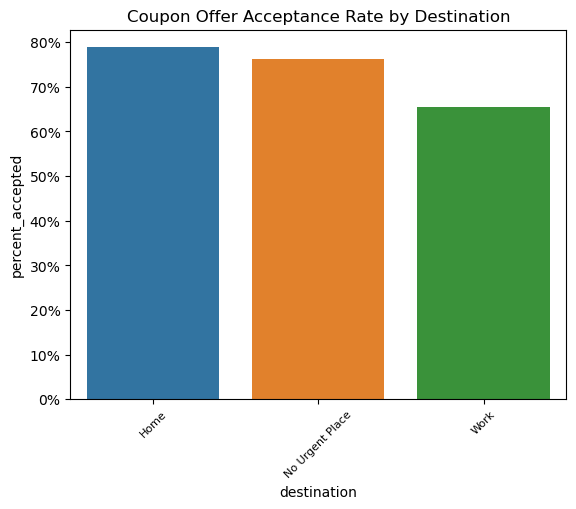


**********************************************************************************

       destination  percent_accepted  num_accepted  count
0             Home          0.788668           515    653
1  No Urgent Place          0.762781           746    978
2             Work          0.654856           499    762 None

**********************************************************************************



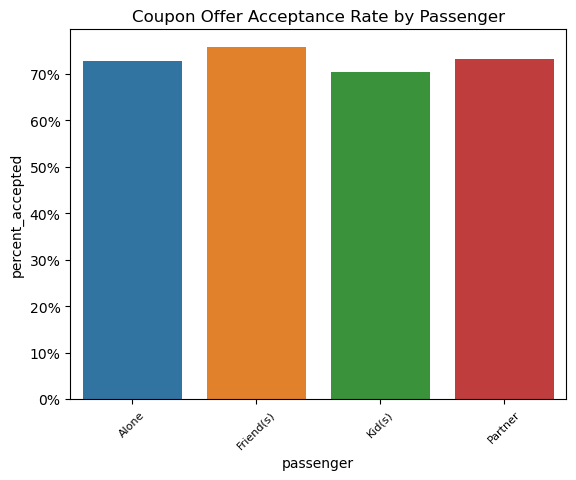


**********************************************************************************

   passenger  percent_accepted  num_accepted  count
0      Alone          0.727402          1022   1405
1  Friend(s)          0.757781           560    739
2     Kid(s)          0.703947           107    152
3    Partner          0.731959            71     97 None

**********************************************************************************



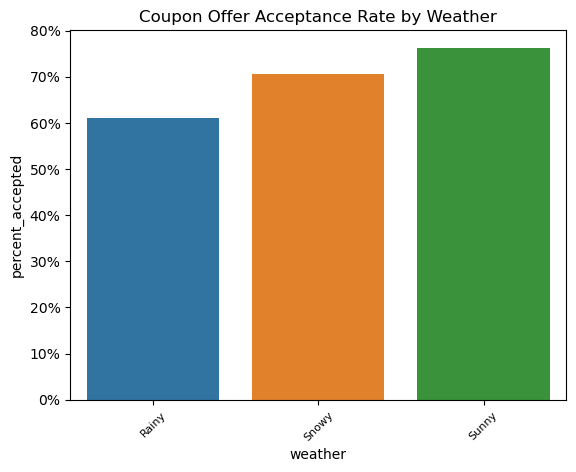


**********************************************************************************

  weather  percent_accepted  num_accepted  count
0   Rainy          0.611285           195    319
1   Snowy          0.706840           217    307
2   Sunny          0.762875          1348   1767 None

**********************************************************************************



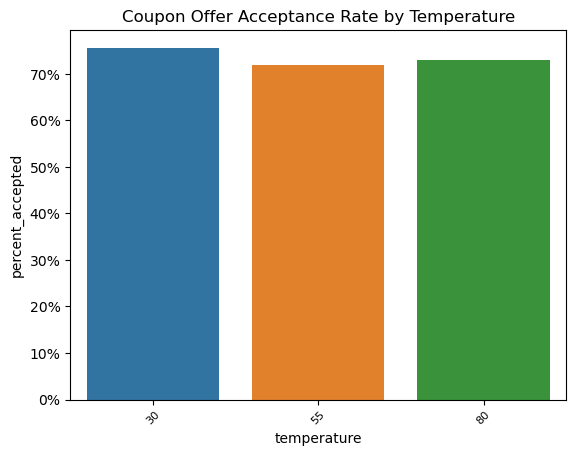


**********************************************************************************

   temperature  percent_accepted  num_accepted  count
0           30          0.756325           568    751
1           55          0.718750           414    576
2           80          0.729831           778   1066 None

**********************************************************************************



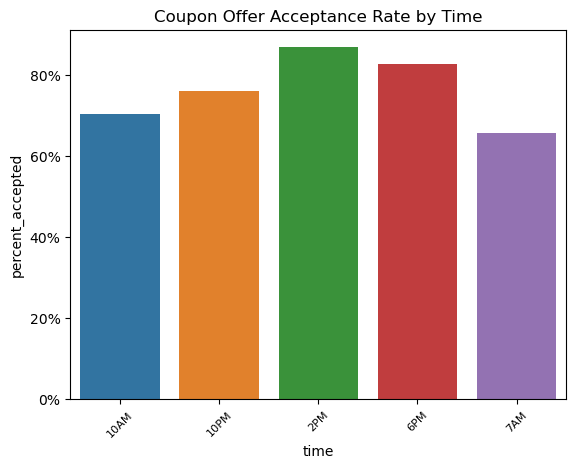


**********************************************************************************

   time  percent_accepted  num_accepted  count
0  10AM          0.702128           363    517
1  10PM          0.759219           350    461
2   2PM          0.866972           189    218
3   6PM          0.825287           359    435
4   7AM          0.654856           499    762 None

**********************************************************************************



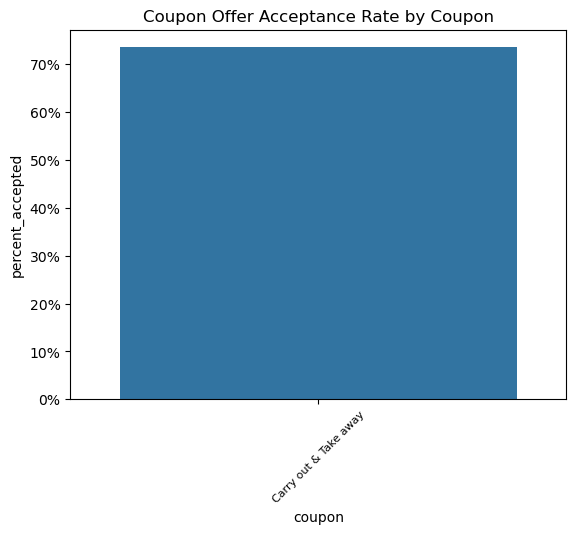


**********************************************************************************

                  coupon  percent_accepted  num_accepted  count
0  Carry out & Take away          0.735478          1760   2393 None

**********************************************************************************



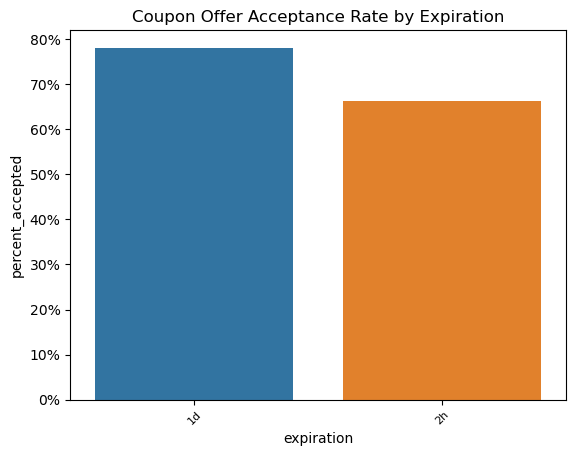


**********************************************************************************

  expiration  percent_accepted  num_accepted  count
0         1d          0.781593          1138   1456
1         2h          0.663821           622    937 None

**********************************************************************************



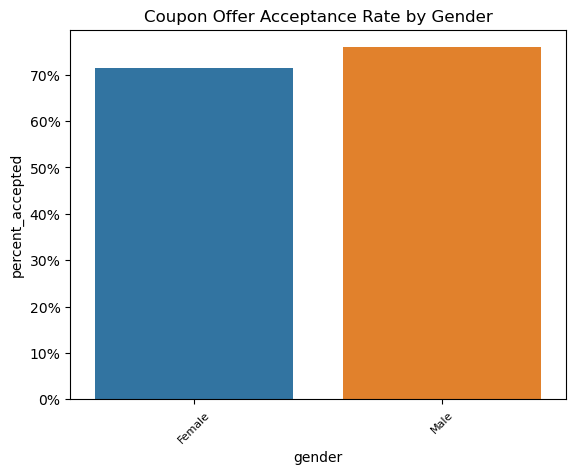


**********************************************************************************

   gender  percent_accepted  num_accepted  count
0  Female           0.71371           885   1240
1    Male           0.75889           875   1153 None

**********************************************************************************



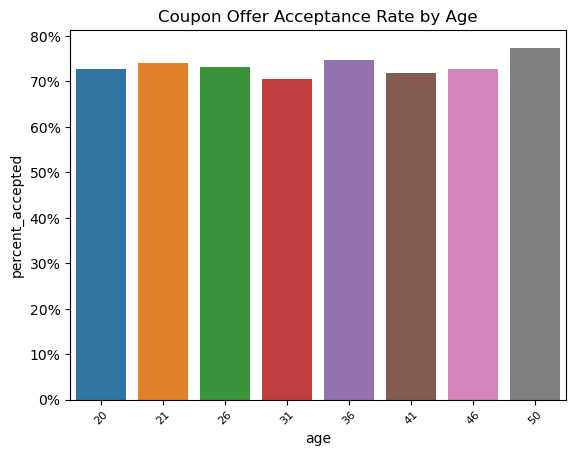


**********************************************************************************

   age  percent_accepted  num_accepted  count
0   20          0.728070            83    114
1   21          0.740741           360    486
2   26          0.731915           344    470
3   31          0.705584           278    394
4   36          0.746988           186    249
5   41          0.717703           150    209
6   46          0.728000            91    125
7   50          0.774566           268    346 None

**********************************************************************************



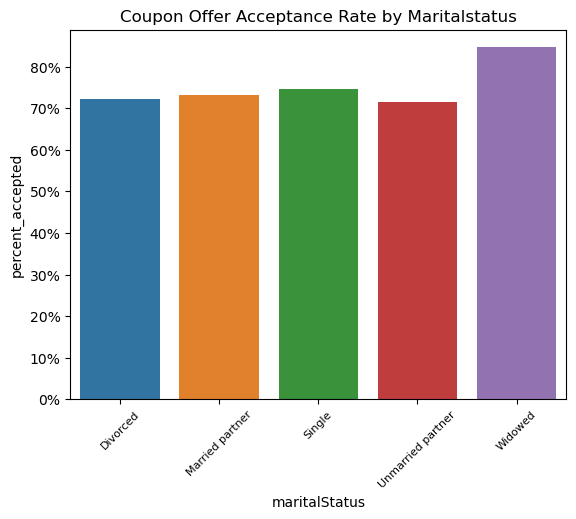


**********************************************************************************

       maritalStatus  percent_accepted  num_accepted  count
0           Divorced          0.722222            78    108
1    Married partner          0.731707           690    943
2             Single          0.746767           693    928
3  Unmarried partner          0.713918           277    388
4            Widowed          0.846154            22     26 None

**********************************************************************************



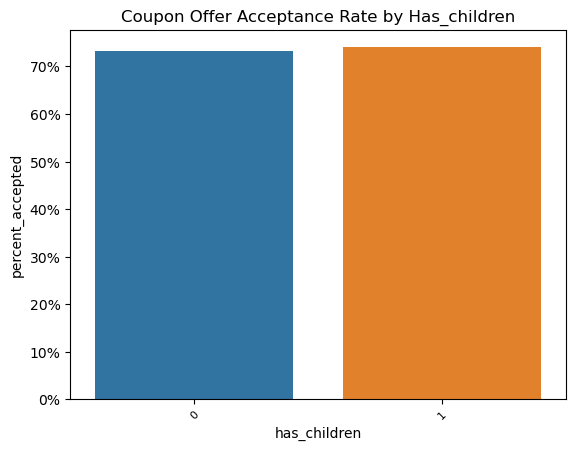


**********************************************************************************

   has_children  percent_accepted  num_accepted  count
0             0          0.732260          1001   1367
1             1          0.739766           759   1026 None

**********************************************************************************



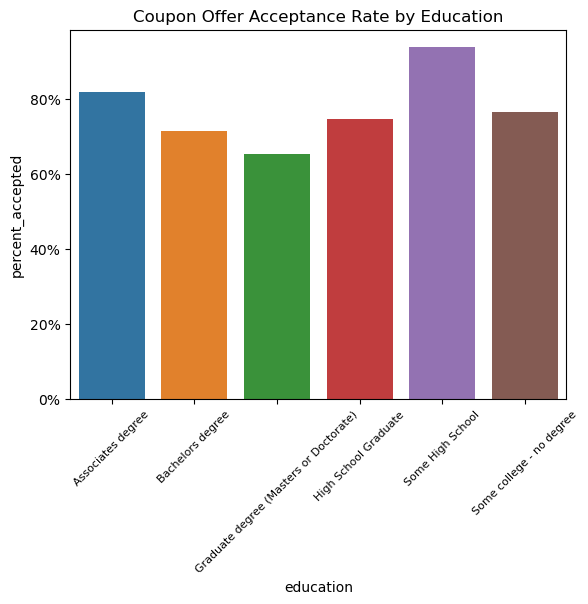


**********************************************************************************

                                education  percent_accepted  num_accepted  \
0                       Associates degree          0.817352           179   
1                        Bachelors degree          0.714286           580   
2  Graduate degree (Masters or Doctorate)          0.653631           234   
3                    High School Graduate          0.745856           135   
4                        Some High School          0.937500            15   
5                Some college - no degree          0.764560           617   

   count  
0    219  
1    812  
2    358  
3    181  
4     16  
5    807   None

**********************************************************************************



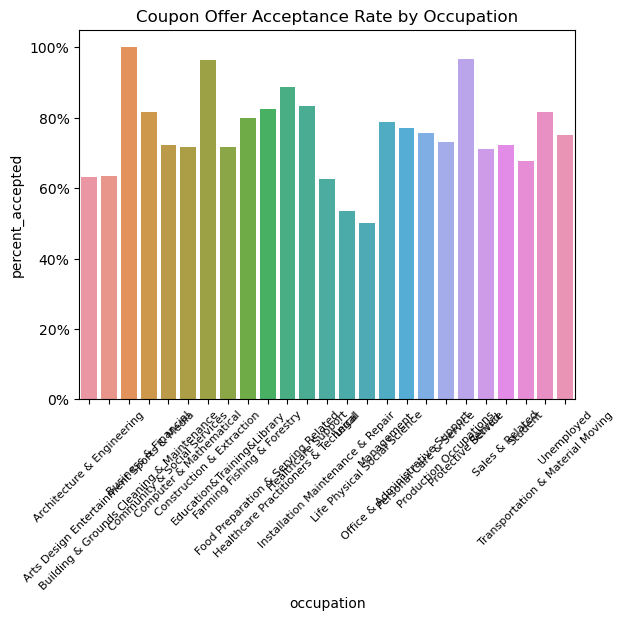


**********************************************************************************

                                   occupation  percent_accepted  num_accepted  \
0                  Architecture & Engineering          0.633333            19   
1    Arts Design Entertainment Sports & Media          0.634783            73   
2   Building & Grounds Cleaning & Maintenance          1.000000             9   
3                        Business & Financial          0.817308            85   
4                 Community & Social Services          0.723404            34   
5                     Computer & Mathematical          0.717054           185   
6                   Construction & Extraction          0.964286            27   
7                  Education&Training&Library          0.716667           129   
8                  Farming Fishing & Forestry          0.800000             8   
9          Food Preparation & Serving Related          0.825397            52   
10       Healthcare Prac

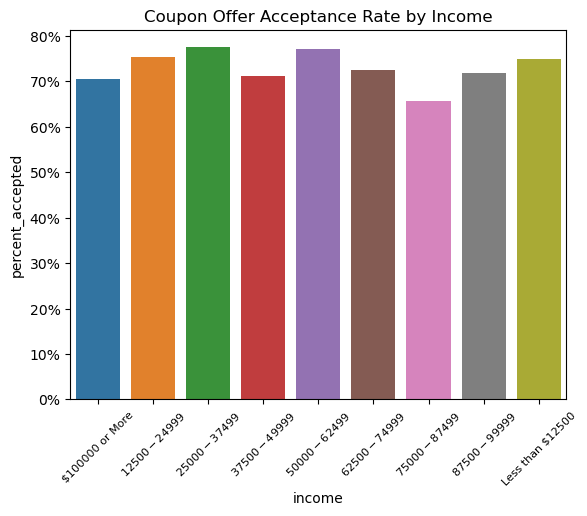


**********************************************************************************

             income  percent_accepted  num_accepted  count
0   $100000 or More          0.705882           228    323
1   $12500 - $24999          0.752907           259    344
2   $25000 - $37499          0.774869           296    382
3   $37500 - $49999          0.712610           243    341
4   $50000 - $62499          0.772109           227    294
5   $62500 - $74999          0.726115           114    157
6   $75000 - $87499          0.656805           111    169
7   $87500 - $99999          0.719298           123    171
8  Less than $12500          0.750000           159    212 None

**********************************************************************************



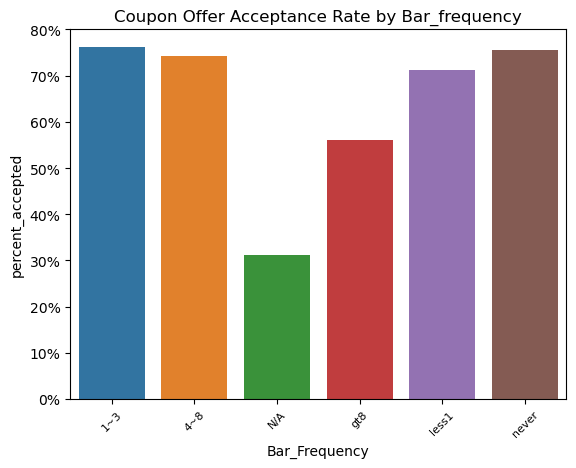


**********************************************************************************

  Bar_Frequency  percent_accepted  num_accepted  count
0           1~3          0.762208           359    471
1           4~8          0.742268           144    194
2           N/A          0.312500             5     16
3           gt8          0.560606            37     66
4         less1          0.712991           472    662
5         never          0.755081           743    984 None

**********************************************************************************



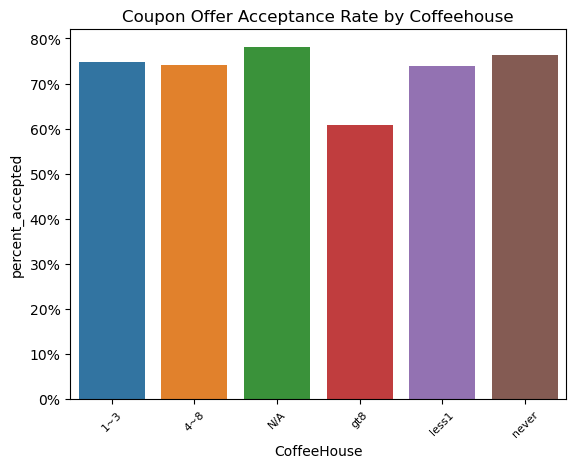


**********************************************************************************

  CoffeeHouse  percent_accepted  num_accepted  count
0         1~3          0.747492           447    598
1         4~8          0.740634           257    347
2         N/A          0.781250            25     32
3         gt8          0.607306           133    219
4       less1          0.738019           462    626
5       never          0.763573           436    571 None

**********************************************************************************



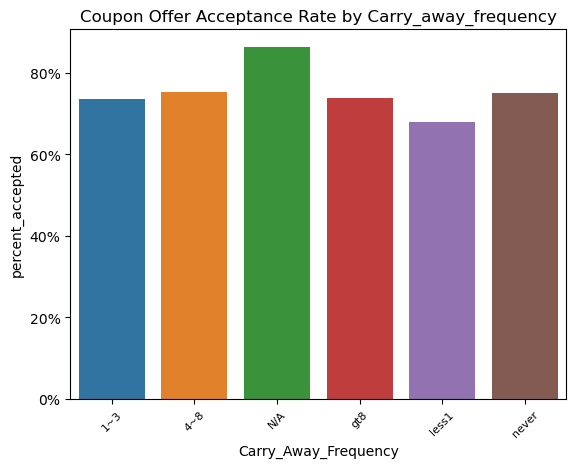


**********************************************************************************

  Carry_Away_Frequency  percent_accepted  num_accepted  count
0                  1~3          0.736111           636    864
1                  4~8          0.753659           618    820
2                  N/A          0.863636            19     22
3                  gt8          0.738411           223    302
4                less1          0.679887           240    353
5                never          0.750000            24     32 None

**********************************************************************************



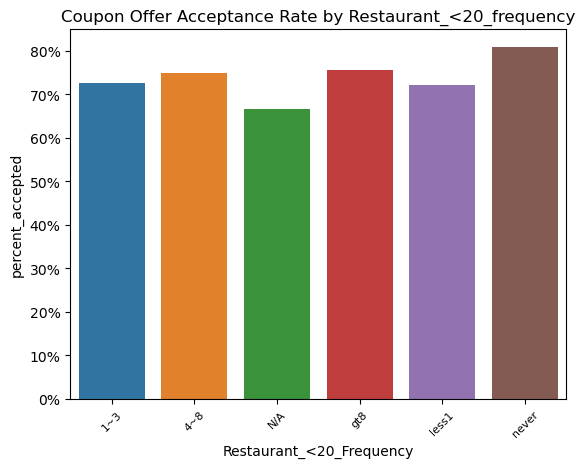


**********************************************************************************

  Restaurant_<20_Frequency  percent_accepted  num_accepted  count
0                      1~3          0.726202           740   1019
1                      4~8          0.748521           506    676
2                      N/A          0.666667            12     18
3                      gt8          0.755365           176    233
4                    less1          0.720000           288    400
5                    never          0.808511            38     47 None

**********************************************************************************



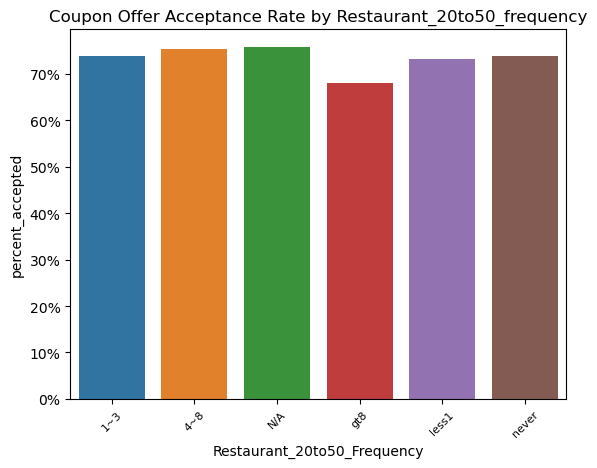


**********************************************************************************

  Restaurant_20to50_Frequency  percent_accepted  num_accepted  count
0                         1~3          0.738843           447    605
1                         4~8          0.753333           113    150
2                         N/A          0.757576            25     33
3                         gt8          0.680851            32     47
4                       less1          0.732297           848   1158
5                       never          0.737500           295    400 None

**********************************************************************************



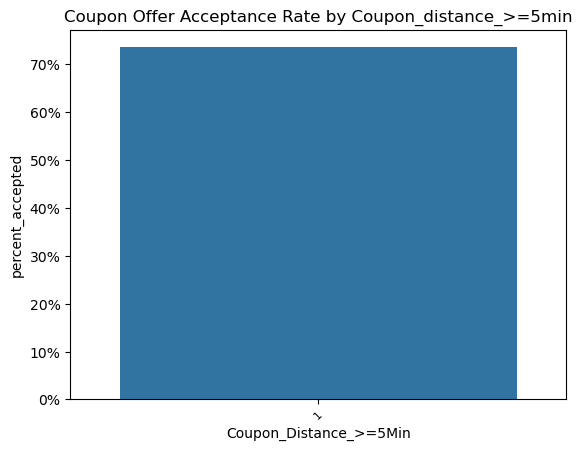


**********************************************************************************

   Coupon_Distance_>=5Min  percent_accepted  num_accepted  count
0                       1          0.735478          1760   2393 None

**********************************************************************************



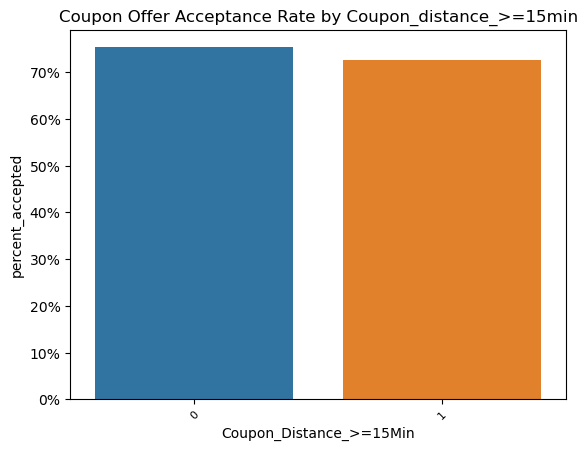


**********************************************************************************

   Coupon_Distance_>=15Min  percent_accepted  num_accepted  count
0                        0          0.752577           657    873
1                        1          0.725658          1103   1520 None

**********************************************************************************



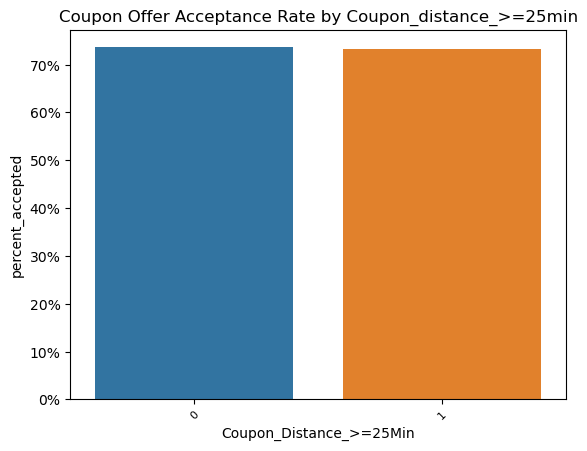


**********************************************************************************

   Coupon_Distance_>=25Min  percent_accepted  num_accepted  count
0                        0          0.735902          1566   2128
1                        1          0.732075           194    265 None

**********************************************************************************



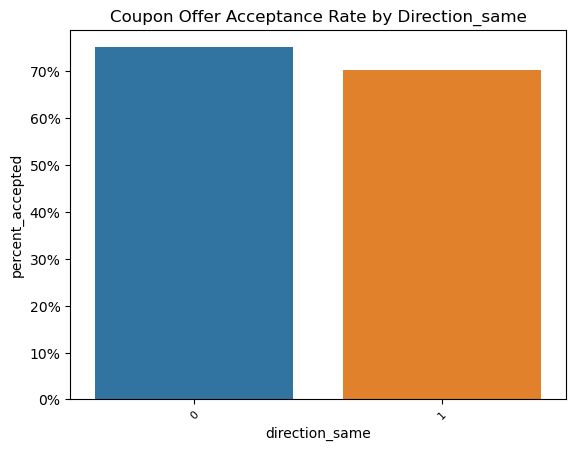


**********************************************************************************

   direction_same  percent_accepted  num_accepted  count
0               0          0.751250          1202   1600
1               1          0.703657           558    793 None

**********************************************************************************



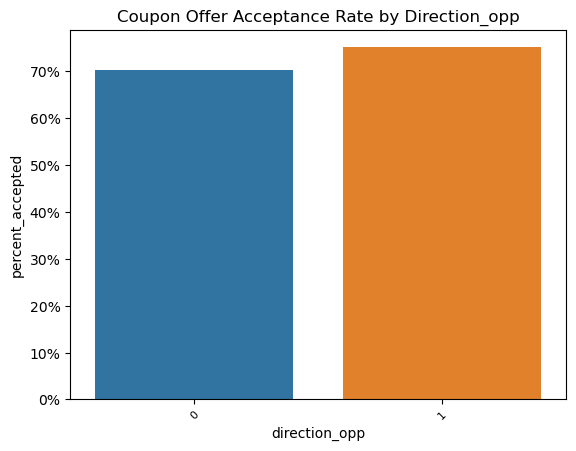


**********************************************************************************

   direction_opp  percent_accepted  num_accepted  count
0              0          0.703657           558    793
1              1          0.751250          1202   1600 None

**********************************************************************************



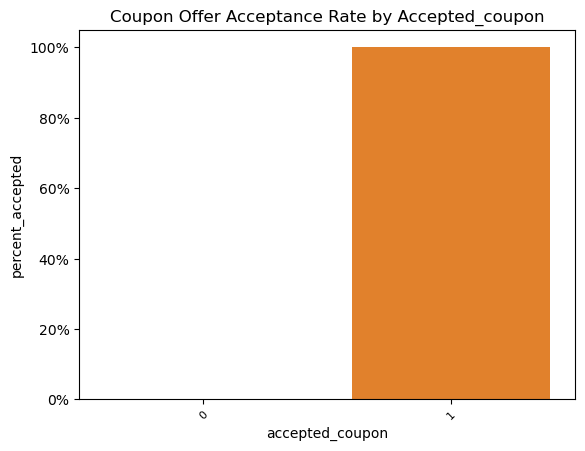


**********************************************************************************

   accepted_coupon  percent_accepted  num_accepted  count
0                0               0.0             0    633
1                1               1.0          1760   1760 None

**********************************************************************************



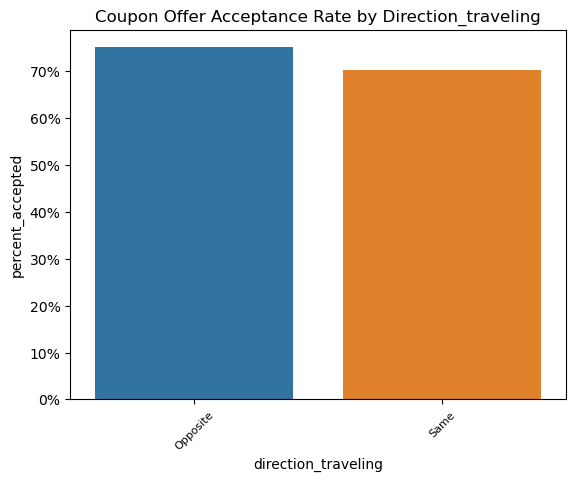


**********************************************************************************

  direction_traveling  percent_accepted  num_accepted  count
0            Opposite          0.751250          1202   1600
1                Same          0.703657           558    793 None

**********************************************************************************



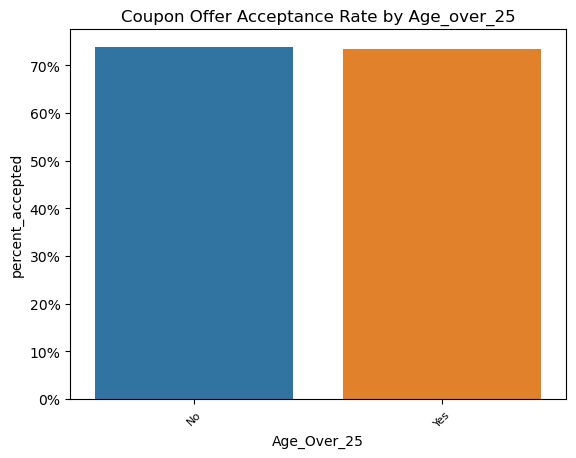


**********************************************************************************

  Age_Over_25  percent_accepted  num_accepted  count
0          No          0.738333           443    600
1         Yes          0.734523          1317   1793 None

**********************************************************************************



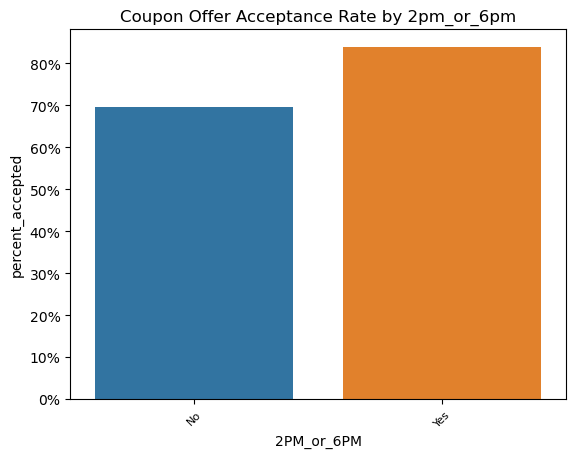


**********************************************************************************

  2PM_or_6PM  percent_accepted  num_accepted  count
0         No          0.696552          1212   1740
1        Yes          0.839204           548    653 None

**********************************************************************************



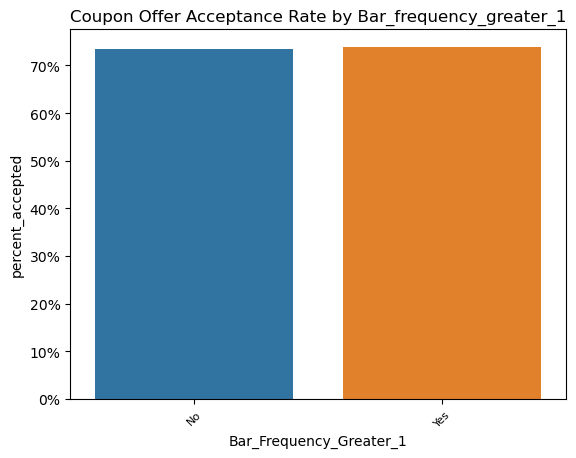


**********************************************************************************

  Bar_Frequency_Greater_1  percent_accepted  num_accepted  count
0                      No          0.734055          1220   1662
1                     Yes          0.738714           540    731 None

**********************************************************************************



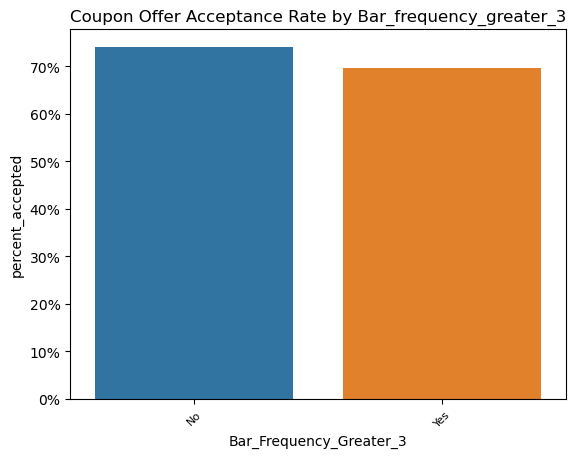


**********************************************************************************

  Bar_Frequency_Greater_3  percent_accepted  num_accepted  count
0                      No          0.740272          1579   2133
1                     Yes          0.696154           181    260 None

**********************************************************************************



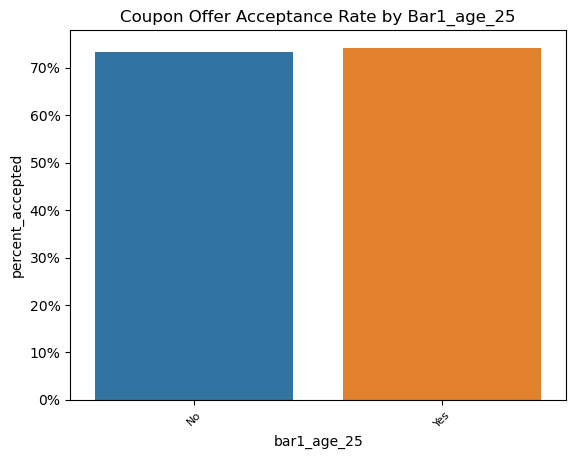


**********************************************************************************

  bar1_age_25  percent_accepted  num_accepted  count
0          No          0.733655          1369   1866
1         Yes          0.741935           391    527 None

**********************************************************************************



In [884]:
# on each column in the dataframe to see the characteristics of higher acceptance rates.

for col in carry_out_coupon_df.columns:
    group_percentages(carry_out_coupon_df,col)

### Comparing Male and Female Carry Out Coupons by Alone or With a Friend Age 36 and Older

* The data shows when traveling with a friend, male and female acceptance rates are very high at the 

In [885]:
#Carryout acceptance for males with friends in 2PM and 6PM hour versus other times.

carryout_male_friend_peaktime = carry_out_coupon_df.query("gender == 'Male' \
                                                         and passenger == 'Friend(s)' \
                                                         and `2PM_or_6PM` == 'Yes'").groupby('accepted_coupon').count()['destination'].reset_index().rename(columns={'destination':'carryout_male_friend_peak'})

carryout_male_friend_notpeaktime = carry_out_coupon_df.query("gender == 'Male' \
                                                        and passenger == 'Friend(s)' \
                                                        and `2PM_or_6PM` == 'No'").groupby('accepted_coupon').count()['destination'].reset_index().rename(columns={'destination':'carryout_male_friend_notpeak'})

male_coupon_compare = carryout_male_friend_peaktime.merge(right=carryout_male_friend_notpeaktime,
                                                          left_on='accepted_coupon', 
                                                          right_on='accepted_coupon' )

for col in male_coupon_compare.columns[1:]:
    total = male_coupon_compare[col].sum()
    male_coupon_compare[f'{col}_percentage'] = (male_coupon_compare[col] / total) * 100

male_coupon_compare

,accepted_coupon,carryout_male_friend_peak,carryout_male_friend_notpeak,carryout_male_friend_peak_percentage,carryout_male_friend_notpeak_percentage
0,0,14,69,14.141414,25.555556
1,1,85,201,85.858586,74.444444


In [886]:
#Carryout acceptance for females with friends in 2PM and 6PM hour versus other times.

carryout_female_friend_peaktime = carry_out_coupon_df.query("gender == 'Female' \
                                                   and passenger == 'Friend(s)' \
                                                   and `2PM_or_6PM` == 'Yes'").groupby('accepted_coupon').count()['destination'].reset_index().rename(columns={'destination':'carryout_female_friend_peak'})

carryout_female_friend_notpeaktime = carry_out_coupon_df.query("gender == 'Female' \
                                                        and passenger == 'Friend(s)' \
                                                        and `2PM_or_6PM` == 'No'").groupby('accepted_coupon').count()['destination'].reset_index().rename(columns={'destination':'carryout_female_friend_notpeak'})

female_coupon_compare = carryout_female_friend_peaktime.merge(right=carryout_female_friend_notpeaktime,
                                                              left_on='accepted_coupon', 
                                                              right_on='accepted_coupon' )

for col in female_coupon_compare.columns[1:]:
    total = female_coupon_compare[col].sum()
    female_coupon_compare[f'{col}_percentage'] = (female_coupon_compare[col] / total) * 100

female_coupon_compare

,accepted_coupon,carryout_female_friend_peak,carryout_female_friend_notpeak,carryout_female_friend_peak_percentage,carryout_female_friend_notpeak_percentage
0,0,8,88,7.619048,33.207547
1,1,97,177,92.380952,66.792453


In [887]:
coupon_m_f_combined = male_coupon_compare.merge(right=female_coupon_compare, left_index=True, right_index=True)
coupon_m_f_combined = coupon_m_f_combined[['carryout_male_friend_peak_percentage',
                              'carryout_male_friend_notpeak_percentage',
                              'carryout_female_friend_peak_percentage',
                              'carryout_female_friend_notpeak_percentage'
                                          ]].transpose()
coupon_m_f_combined

,0,1
carryout_male_friend_peak_percentage,14.141414,85.858586
carryout_male_friend_notpeak_percentage,25.555556,74.444444
carryout_female_friend_peak_percentage,7.619048,92.380952
carryout_female_friend_notpeak_percentage,33.207547,66.792453


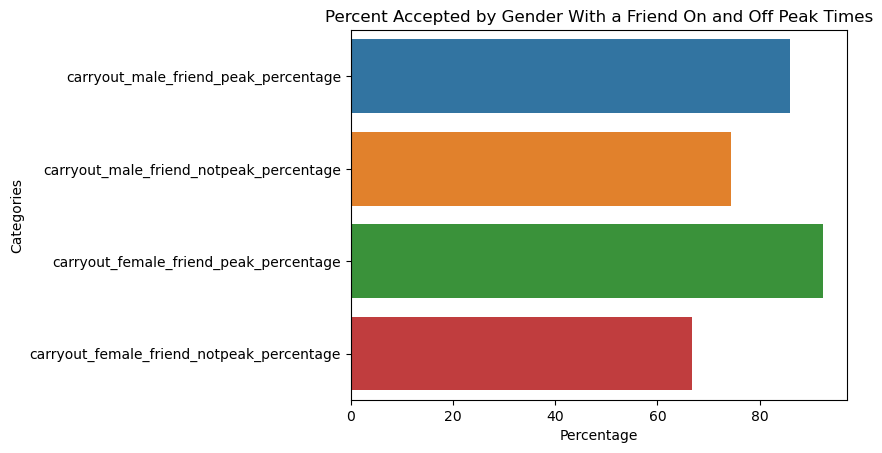

In [888]:
sns.barplot(x=coupon_m_f_combined[1], y=coupon_m_f_combined.index)
plt.title('Percent Accepted by Gender With a Friend On and Off Peak Times')
plt.xlabel('Percentage')
plt.ylabel('Categories')
plt.show()

In [889]:
cleaned_data.head(4)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar_Frequency,CoffeeHouse,Carry_Away_Frequency,Restaurant_<20_Frequency,Restaurant_20to50_Frequency,Coupon_Distance_>=5Min,Coupon_Distance_>=15Min,Coupon_Distance_>=25Min,direction_same,direction_opp,accepted_coupon,direction_traveling,Age_Over_25,2PM_or_6PM,Bar_Frequency_Greater_1,Bar_Frequency_Greater_3,bar1_age_25
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,N/A,4~8,1~3,1,0,0,0,1,1,Opposite,No,Yes,No,No,No
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,N/A,4~8,1~3,1,0,0,0,1,0,Opposite,No,No,No,No,No
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,N/A,4~8,1~3,1,1,0,0,1,1,Opposite,No,No,No,No,No
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,N/A,4~8,1~3,1,1,0,0,1,0,Opposite,No,Yes,No,No,No


### Summary of Findings

### Out of the entire dataset, 57% of the observations accepted a coupon.  

### Characteristics of higher acceptance rates were:

* Destination was "No Urgent Place"
* Passenger was with a Friend
* Weather was sunny.
* Temperature was 80
* Time was 2PM
* Coupon was Carryout and Take away
* Coupon expired in 1 day
* Younger versus older.
* Marital status was single
* Had Some High School education.
* Had low income.

### A review of those who accepted bar coupons had an overall acceptance rate of 59%.  

### Characteristics of higher acceptance rates were:

* Destination was "Home.
* Passenger was with Friend.
* Weather was Sunny
* Temperature was 55.
* Time was 6PM and 10PM
* Gender was male.
* Age was less or equal to 31.
* Marital status was single.
* Did not have children.

* Acceptance rates were 71% for those that didn't have a kid passenger.  Also, for those that didn't have a kid passenger and not widowed, the acceptance rate was 71%.  Not having a kid passenger made an impact on acceptance rates.

### Out of the population of coupons for Carryout & Take away, 73% of the observations accepted a coupon.  

### Characteristics of higher acceptance rates were:

* Destination was "Home".
* Gender was male.
* Weather was sunny.
* Temperature was 80
* Time was 2PM
* Age was 50 and older.
* Coupon expired in 1 day
* Had Some High School education.

* For this segment looked at gender and peak times of 2PM and 6PM versus non peak times.  Acceptance rates were 85% for males with a friend at peak times and 92% for females with a friend.

### Further Investigation

 * I think it would be interesting to see if the number of children had an impact not just if they had kids.  It is likely that income levels and number of children in household could have an affect on coupon acceptance.
 * If traffic data such as number of traffic lights or neighborhood location where lived likely has an affect on the coupons that would be accepted.  
 * Distance business is from work may be an interesting feature to try to get.